# community detection with Machine Learning

Community detection with 4 different algorithms: 

- MODULARITY-BASED COMMUNITIES : greedy modularity algorithm
- HIGHEST-MODULARITY PARTITION BASED : louvain algorithm
- LARGEST-SUBGRAPHS BASED : maximal cliques
- LABEL PROPAGATION COMMUNITIES

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
from math import *
import itertools as it
import collections

import networkx as nx
import community
from networkx.algorithms.community.centrality import girvan_newman

from cdlib import algorithms
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [19]:
# import graph files
taipei_graph = nx.read_graphml('/Users/juliencarbonnell/Desktop/Thèse/DONNÉES/1.Twitter/SNA/graph files/taipei_graph.graphml')
telaviv_graph = nx.read_graphml('/Users/juliencarbonnell/Desktop/Thèse/DONNÉES/1.Twitter/SNA/graph files/telaviv_graph.graphml')
tallinn_graph = nx.read_graphml('/Users/juliencarbonnell/Desktop/Thèse/DONNÉES/1.Twitter/SNA/graph files/tallinn_graph.graphml')

public_graph = nx.read_graphml('/Users/juliencarbonnell/Desktop/Thèse/DONNÉES/1.Twitter/SNA/graph files/public_graph.graphml')
corpo_graph = nx.read_graphml('/Users/juliencarbonnell/Desktop/Thèse/DONNÉES/1.Twitter/SNA/graph files/corpo_graph.graphml')
startup_graph = nx.read_graphml('/Users/juliencarbonnell/Desktop/Thèse/DONNÉES/1.Twitter/SNA/graph files/startup_graph.graphml')
academic_graph = nx.read_graphml('/Users/juliencarbonnell/Desktop/Thèse/DONNÉES/1.Twitter/SNA/graph files/academic_graph.graphml')
civil_graph = nx.read_graphml('/Users/juliencarbonnell/Desktop/Thèse/DONNÉES/1.Twitter/SNA/graph files/civil_graph.graphml')
media_graph = nx.read_graphml('/Users/juliencarbonnell/Desktop/Thèse/DONNÉES/1.Twitter/SNA/graph files/media_graph.graphml')

In [22]:
graphs = [taipei_graph, 
            telaviv_graph, 
            tallinn_graph, 
            public_graph,
            corpo_graph,
            startup_graph,
            academic_graph,
            civil_graph,
            media_graph
             ]

In [2]:
# import network measures files
network_measures = pd.read_csv('/Users/juliencarbonnell/Desktop/Thèse/DONNÉES/1.Twitter/SNA/network_measures.csv')

# 1. Greedy Modularity


In [29]:
# greedy modularity algorithm
greedy_communities = [community.greedy_modularity_communities(x) for x in graphs]

In [30]:
greedy_communities

[[frozenset({'KaydenBoche',
             'MFencefox',
             'shefalianand',
             'AnkurChaudhary',
             'Postman_club',
             '_do_it_again_',
             'Jmartincab',
             'alansoon',
             'umanitoba',
             'USTDA',
             'interplay',
             'Jaw109',
             'onetwtuser',
             'EllesPiets',
             'Temasek',
             '_Tamayol_',
             'katiefehren',
             'delstone',
             'Expo2015Milano',
             'WeAre',
             'AbouMarwan',
             'MatterXP_Ltd',
             'victorjym',
             'IsmailMifrah',
             'evmeerkat',
             'UngaroRoberto',
             'Center4wardATL',
             'Coast2Coast_EV',
             'chuckmetz',
             'MichaelFNunez',
             'Ralf_Sallam',
             'jberginc',
             'officinaveneta',
             'TheAtlantic',
             'GioTrevis',
             'CocoyClaravall',
             '

In [33]:
print(len(greedy_communities))

9


In [38]:
for l in greedy_communities:
    print(len(l))

1633
1404
726
3
3
3
3
3
3


In [12]:
num_greedy = [1633,1404,726,3,3,3,3,3,3]
network_measures['greedy_communities'] = num_greedy

# 2. Louvain algorithm

In [51]:
# louvain algorithm taipei
taipei_partition=community.best_partition(taipei_graph, weight='freq')
print('Completed Louvain algorithm .. . . ' )
taipei_values=[taipei_partition.get(node) for node in taipei_graph.nodes()]
taipei_com=taipei_partition.values()

# Creating a dictionary like {community_number:list_of_participants}
taipei_nodes={}

# Populating the dictionary with items
for each_item in taipei_partition.items():
    taipei_community_num=each_item[1]
    taipei_community_node=each_item[0]
    if taipei_community_num in taipei_nodes:
        taipei_value=taipei_nodes.get(taipei_community_num) + ' | ' + str(taipei_community_node)
        taipei_nodes.update({taipei_community_num:taipei_value})
    else:
        taipei_nodes.update({taipei_community_num:taipei_community_node})

# Creating a dataframe from the diet, and getting the output into excel
taipei_community_df=pd.DataFrame.from_dict(taipei_nodes, orient='index',columns=['users'])
taipei_community_df.index.rename('taipei_community_num' , inplace=True)
taipei_community_df.to_csv('taipei_louvain_communities.csv')

Completed Louvain algorithm .. . . 


Modularity:  0.8746511669871416
Total number of Communities= 1609


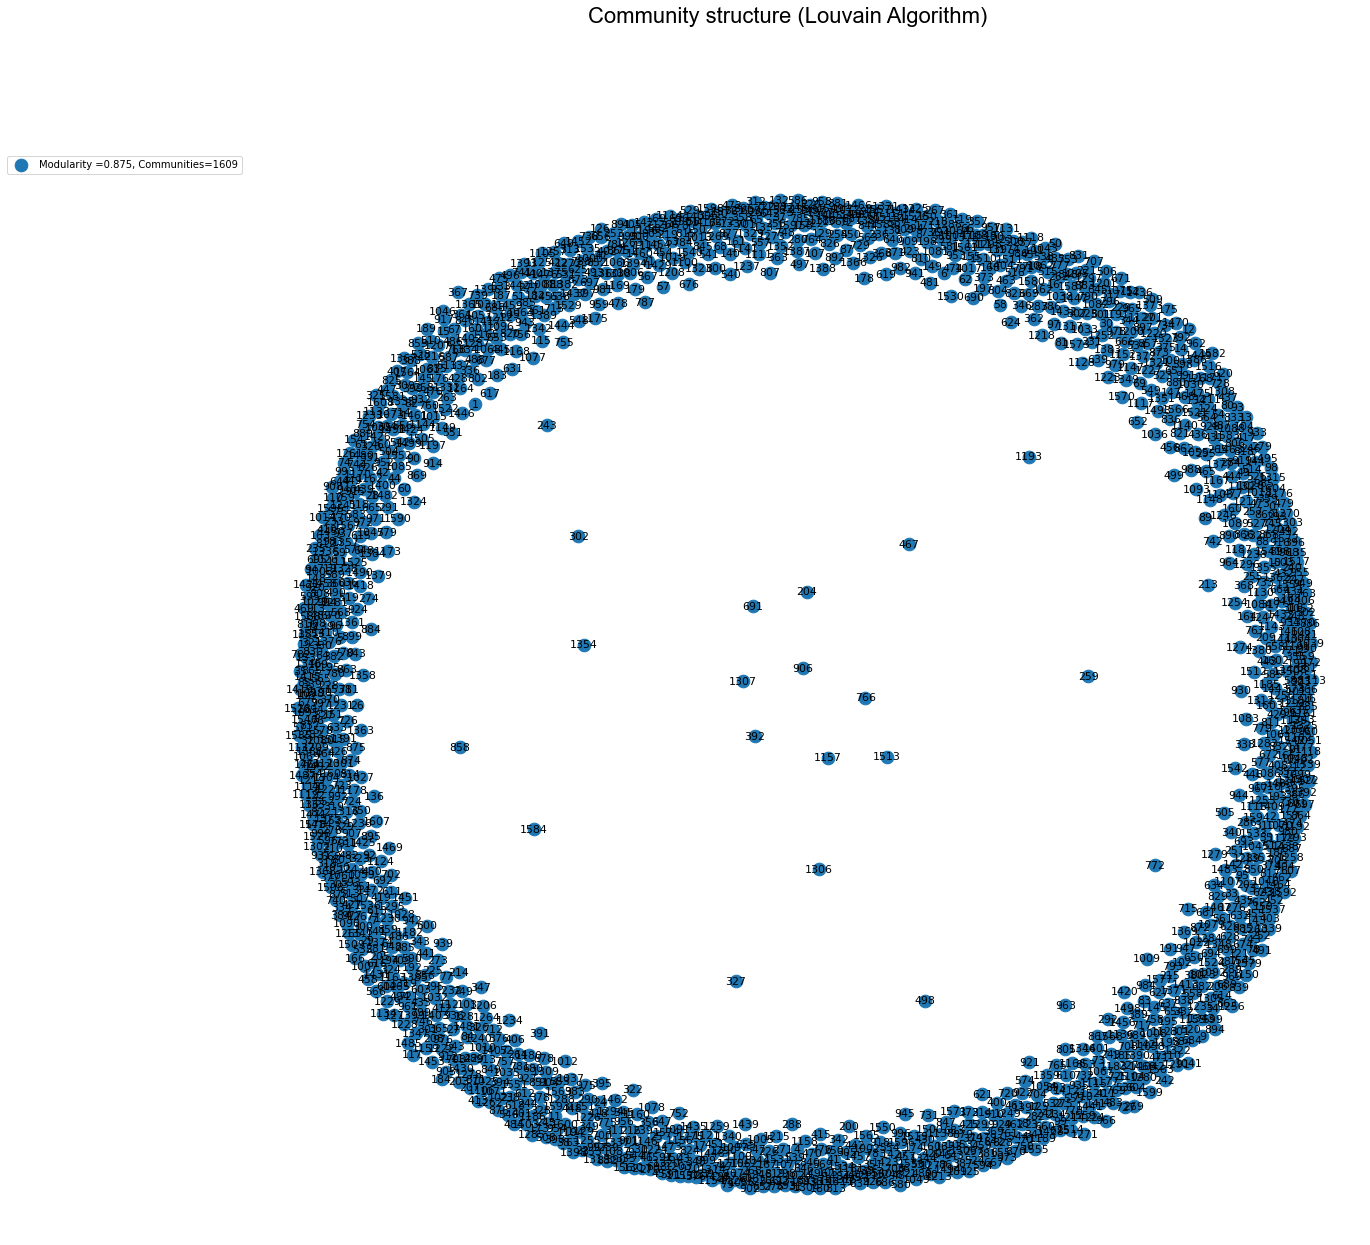

In [18]:
# Creating a new graph to represent the communities created by the Louvain algorithm
plt.rcParams['figure.figsize']= [20, 20]
taipei_comm=nx.Graph()

# Populating the data from the node dictionary created earlier
taipei_comm.add_nodes_from(taipei_nodes)

# Calculating modularity and the total number of communities
taipei_mod=community.modularity(taipei_partition,taipei_graph)
print("Modularity: ", taipei_mod)
print("Total number of Communities=", len(taipei_comm.nodes()))

# Creating the Graph and also calculating Modularity
plt.rcParams['figure.figsize']= [20, 20]
taipei_pos=nx.spring_layout(taipei_comm)
nx.draw_networkx(taipei_comm, taipei_pos, with_labels=True,node_size=160,font_size=11,label='Modularity =' + str(round(mod,3)) +
                    ', Communities=' + str(len(taipei_comm.nodes())))
plt.suptitle('taipei Community structure (Louvain Algorithm)',fontsize=22,fontname='Arial')
plt.box(on=None)
plt.axis('off')
plt.legend(bbox_to_anchor=(0,1), loc='best', ncol=1)
plt.savefig('taipei_louvain.png',dpi=400, bbox_inches='tight')

In [56]:
# louvain algorithm telaviv
telaviv_partition=community.best_partition(telaviv_graph, weight='freq')
print('Completed Louvain algorithm .. . . ' )
telaviv_values=[telaviv_partition.get(node) for node in telaviv_graph.nodes()]
telaviv_com=telaviv_partition.values()

# Creating a dictionary like {community_number:list_of_participants}
telaviv_nodes={}

# Populating the dictionary with items
for each_item in telaviv_partition.items():
    telaviv_community_num=each_item[1]
    telaviv_community_node=each_item[0]
    if telaviv_community_num in telaviv_nodes:
        telaviv_value=telaviv_nodes.get(telaviv_community_num) + ' | ' + str(telaviv_community_node)
        telaviv_nodes.update({telaviv_community_num:telaviv_value})
    else:
        telaviv_nodes.update({telaviv_community_num:telaviv_community_node})

# Creating a dataframe from the diet, and getting the output into excel
telaviv_community_df=pd.DataFrame.from_dict(telaviv_nodes, orient='index',columns=['users'])
telaviv_community_df.index.rename('telaviv_community_num' , inplace=True)
telaviv_community_df.to_csv('telaviv_louvain_communities.csv')

Completed Louvain algorithm .. . . 


Modularity:  0.8108895324302012
Total number of Communities= 1331


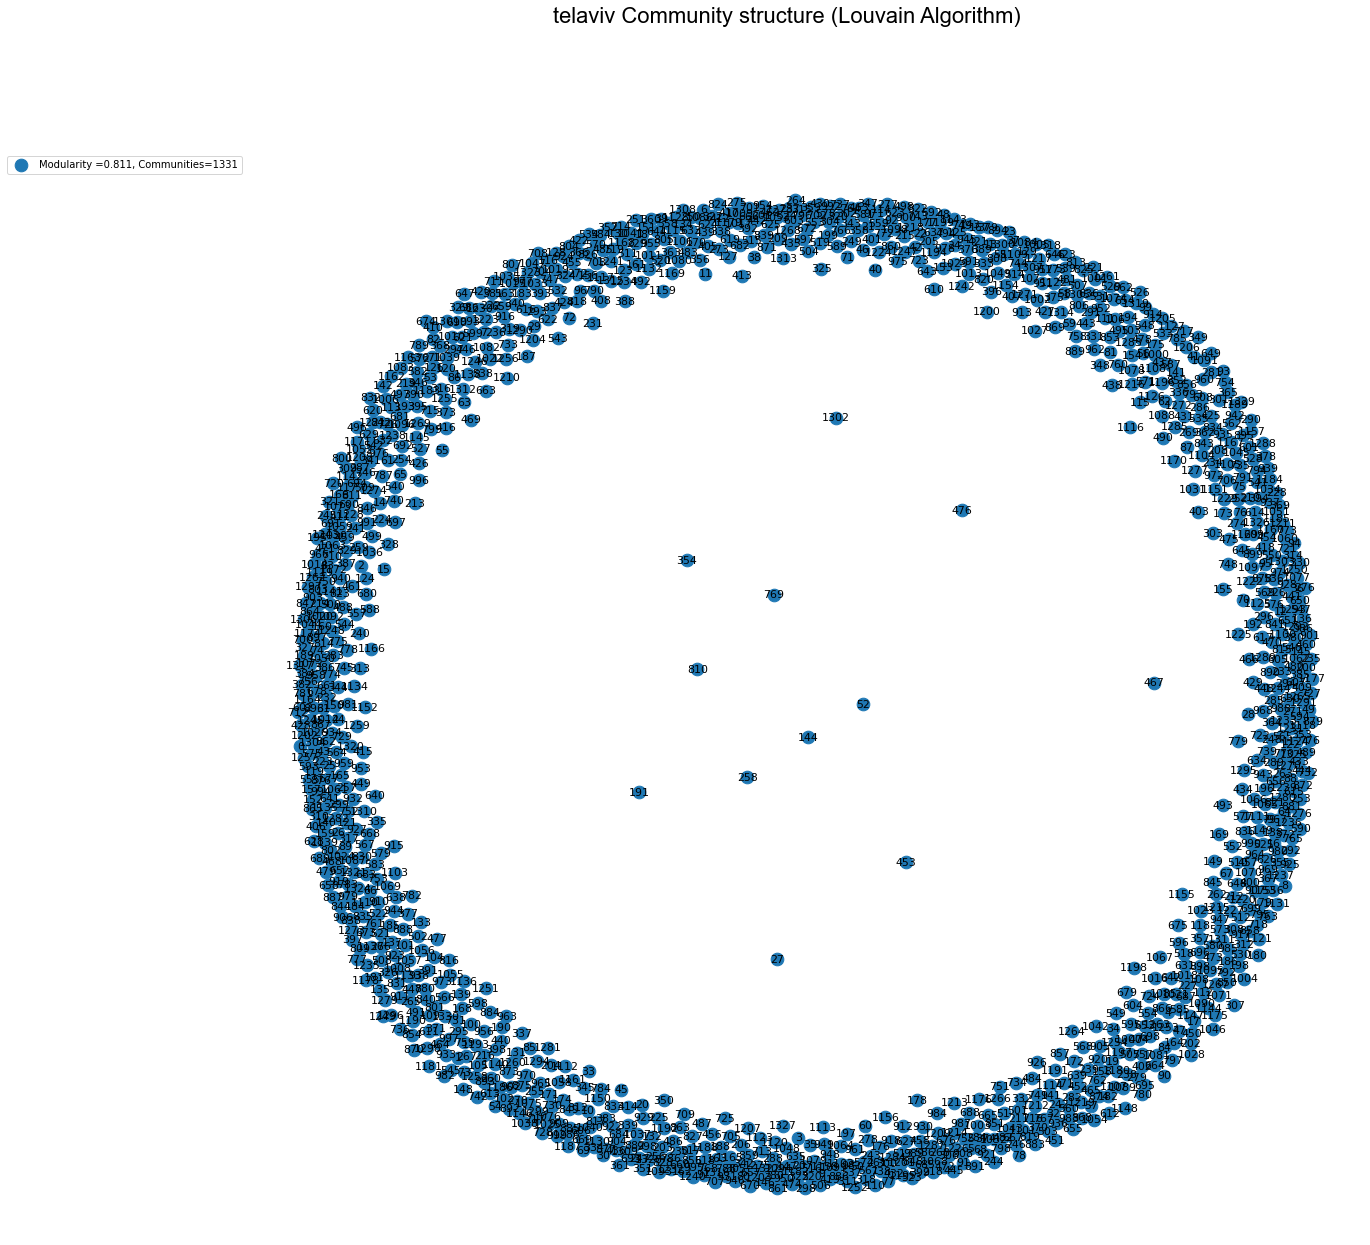

In [57]:
# Creating a new graph to represent the communities created by the Louvain algorithm
plt.rcParams['figure.figsize']= [20, 20]
telaviv_comm=nx.Graph()

# Populating the data from the node dictionary created earlier
telaviv_comm.add_nodes_from(telaviv_nodes)

# Calculating modularity and the total number of communities
telaviv_mod=community.modularity(telaviv_partition,telaviv_graph)
print("Modularity: ", telaviv_mod)
print("Total number of Communities=", len(telaviv_comm.nodes()))

# Creating the Graph and also calculating Modularity
plt.rcParams['figure.figsize']= [20, 20]
telaviv_pos=nx.spring_layout(telaviv_comm)
nx.draw_networkx(telaviv_comm, telaviv_pos, with_labels=True,node_size=160,font_size=11,label='Modularity =' + str(round(telaviv_mod,3)) +
                    ', Communities=' + str(len(telaviv_comm.nodes())))
plt.suptitle('telaviv Community structure (Louvain Algorithm)',fontsize=22,fontname='Arial')
plt.box(on=None)
plt.axis('off')
plt.legend(bbox_to_anchor=(0,1), loc='best', ncol=1)
plt.savefig('telaviv_louvain.png',dpi=400, bbox_inches='tight')

In [58]:
# louvain algorithm tallinn
tallinn_partition=community.best_partition(tallinn_graph, weight='freq')
print('Completed Louvain algorithm .. . . ' )
tallinn_values=[tallinn_partition.get(node) for node in tallinn_graph.nodes()]
tallinn_com=tallinn_partition.values()

# Creating a dictionary like {community_number:list_of_participants}
tallinn_nodes={}

# Populating the dictionary with items
for each_item in tallinn_partition.items():
    tallinn_community_num=each_item[1]
    tallinn_community_node=each_item[0]
    if tallinn_community_num in tallinn_nodes:
        tallinn_value=tallinn_nodes.get(tallinn_community_num) + ' | ' + str(tallinn_community_node)
        tallinn_nodes.update({tallinn_community_num:tallinn_value})
    else:
        tallinn_nodes.update({tallinn_community_num:tallinn_community_node})

# Creating a dataframe from the diet, and getting the output into excel
tallinn_community_df=pd.DataFrame.from_dict(tallinn_nodes, orient='index',columns=['users'])
tallinn_community_df.index.rename('tallinn_community_num' , inplace=True)
tallinn_community_df.to_csv('tallinn_louvain_communities.csv')

Completed Louvain algorithm .. . . 


Modularity:  0.7710235869374245
Total number of Communities= 704


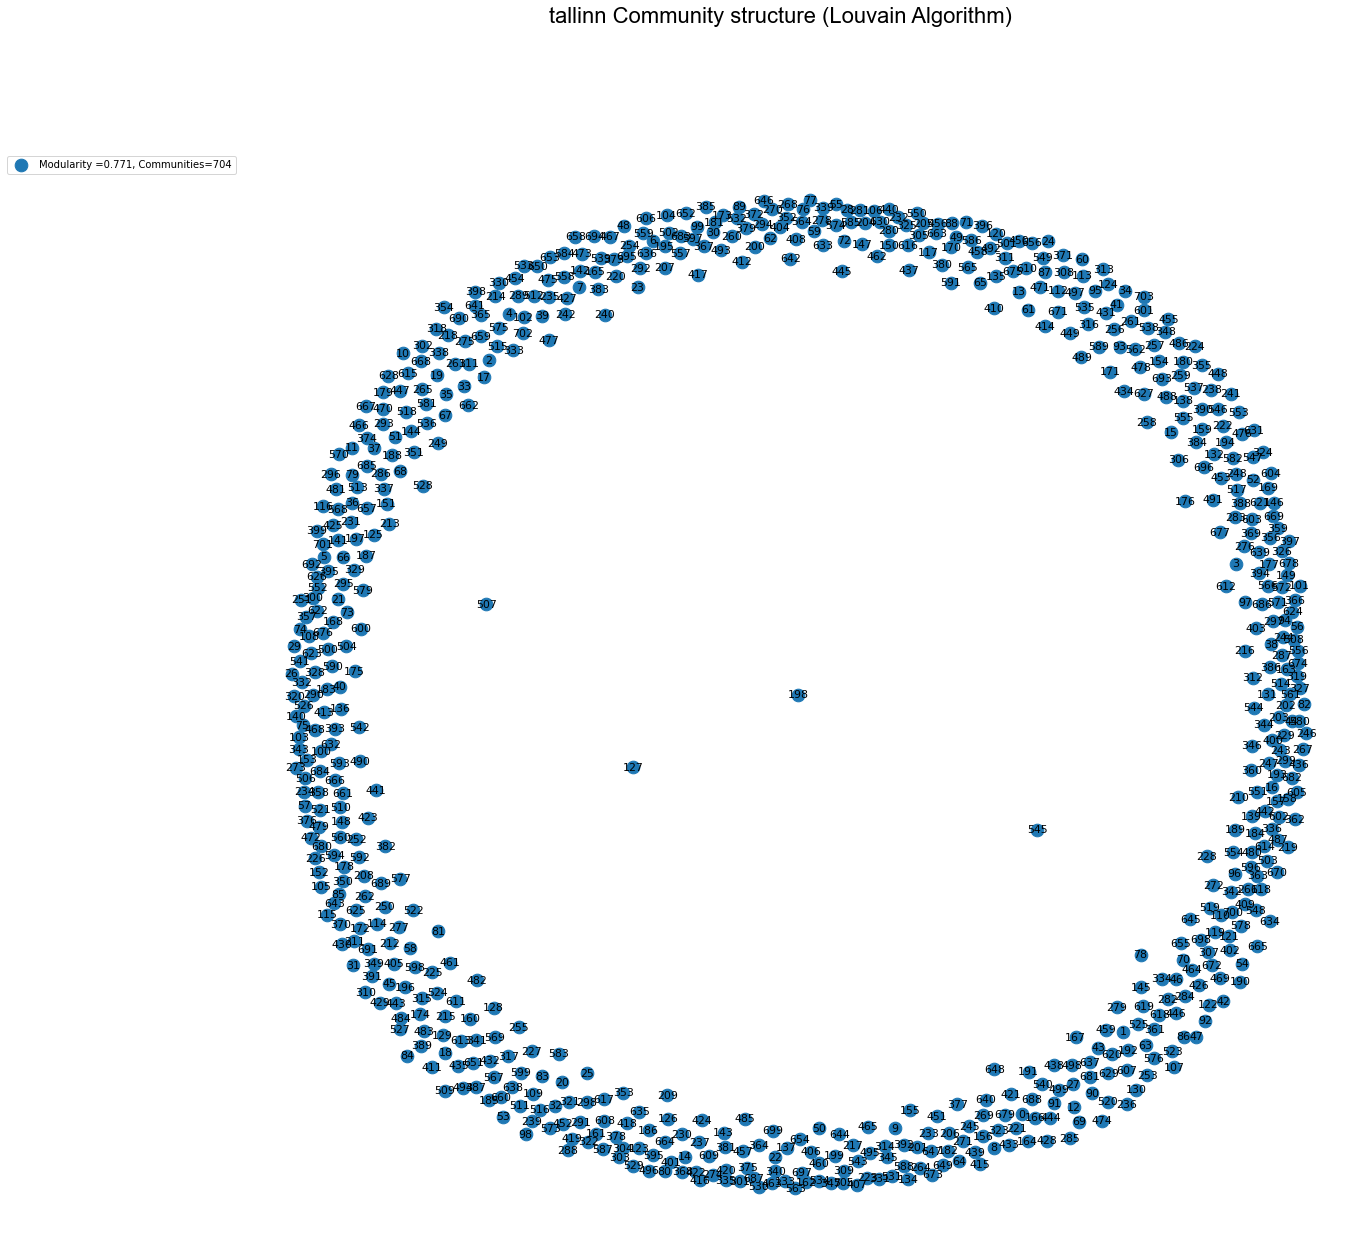

In [59]:
# Creating a new graph to represent the communities created by the Louvain algorithm
plt.rcParams['figure.figsize']= [20, 20]
tallinn_comm=nx.Graph()

# Populating the data from the node dictionary created earlier
tallinn_comm.add_nodes_from(tallinn_nodes)

# Calculating modularity and the total number of communities
tallinn_mod=community.modularity(tallinn_partition,tallinn_graph)
print("Modularity: ", tallinn_mod)
print("Total number of Communities=", len(tallinn_comm.nodes()))

# Creating the Graph and also calculating Modularity
plt.rcParams['figure.figsize']= [20, 20]
tallinn_pos=nx.spring_layout(tallinn_comm)
nx.draw_networkx(tallinn_comm, tallinn_pos, with_labels=True,node_size=160,font_size=11,label='Modularity =' + str(round(tallinn_mod,3)) +
                    ', Communities=' + str(len(tallinn_comm.nodes())))
plt.suptitle('tallinn Community structure (Louvain Algorithm)',fontsize=22,fontname='Arial')
plt.box(on=None)
plt.axis('off')
plt.legend(bbox_to_anchor=(0,1), loc='best', ncol=1)
plt.savefig('tallinn_louvain.png',dpi=400, bbox_inches='tight')

In [60]:
# louvain algorithm public
public_partition=community.best_partition(public_graph, weight='freq')
print('Completed Louvain algorithm .. . . ' )
public_values=[public_partition.get(node) for node in public_graph.nodes()]
public_com=public_partition.values()

# Creating a dictionary like {community_number:list_of_participants}
public_nodes={}

# Populating the dictionary with items
for each_item in public_partition.items():
    public_community_num=each_item[1]
    public_community_node=each_item[0]
    if public_community_num in public_nodes:
        public_value=public_nodes.get(public_community_num) + ' | ' + str(public_community_node)
        public_nodes.update({public_community_num:public_value})
    else:
        public_nodes.update({public_community_num:public_community_node})

# Creating a dataframe from the diet, and getting the output into excel
public_community_df=pd.DataFrame.from_dict(public_nodes, orient='index',columns=['users'])
public_community_df.index.rename('public_community_num' , inplace=True)
public_community_df.to_csv('public_louvain_communities.csv')

Completed Louvain algorithm .. . . 


Modularity:  0.44217309753304235
Total number of Communities= 3


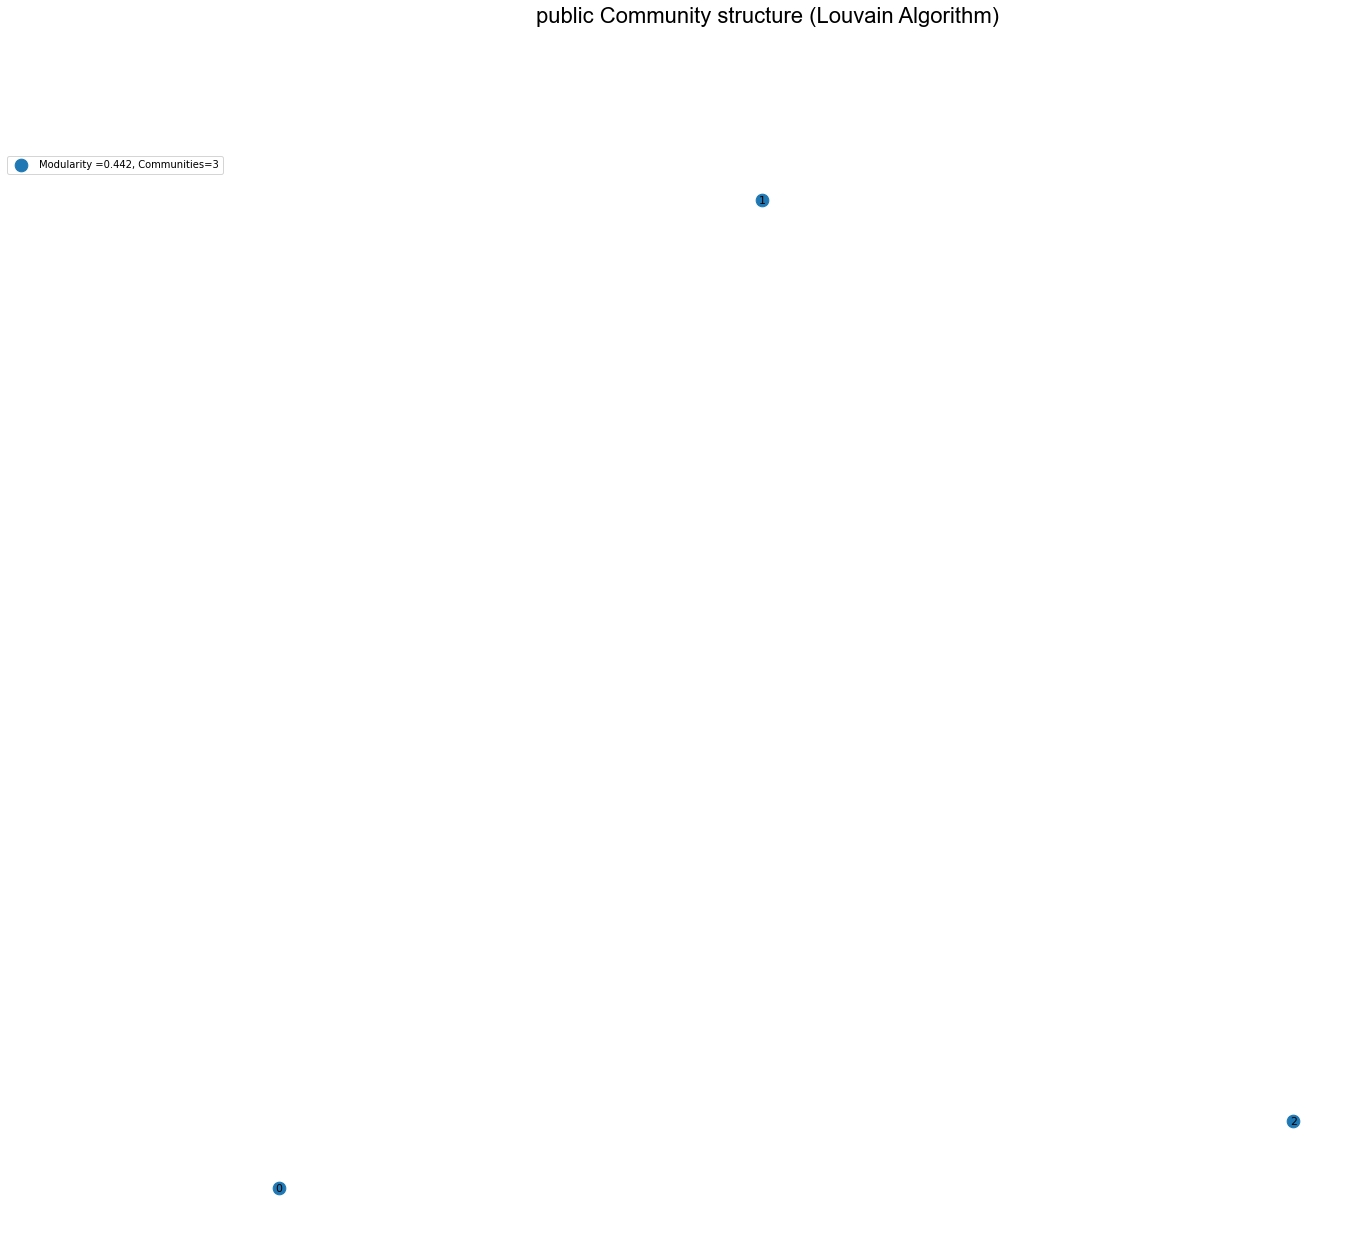

In [61]:
# Creating a new graph to represent the communities created by the Louvain algorithm
plt.rcParams['figure.figsize']= [20, 20]
public_comm=nx.Graph()

# Populating the data from the node dictionary created earlier
public_comm.add_nodes_from(public_nodes)

# Calculating modularity and the total number of communities
public_mod=community.modularity(public_partition,public_graph)
print("Modularity: ", public_mod)
print("Total number of Communities=", len(public_comm.nodes()))

# Creating the Graph and also calculating Modularity
plt.rcParams['figure.figsize']= [20, 20]
public_pos=nx.spring_layout(public_comm)
nx.draw_networkx(public_comm, public_pos, with_labels=True,node_size=160,font_size=11,label='Modularity =' + str(round(public_mod,3)) +
                    ', Communities=' + str(len(public_comm.nodes())))
plt.suptitle('public Community structure (Louvain Algorithm)',fontsize=22,fontname='Arial')
plt.box(on=None)
plt.axis('off')
plt.legend(bbox_to_anchor=(0,1), loc='best', ncol=1)
plt.savefig('public_louvain.png',dpi=400, bbox_inches='tight')

In [62]:
# louvain algorithm corpo
corpo_partition=community.best_partition(corpo_graph, weight='freq')
print('Completed Louvain algorithm .. . . ' )
corpo_values=[corpo_partition.get(node) for node in corpo_graph.nodes()]
corpo_com=corpo_partition.values()

# Creating a dictionary like {community_number:list_of_participants}
corpo_nodes={}

# Populating the dictionary with items
for each_item in corpo_partition.items():
    corpo_community_num=each_item[1]
    corpo_community_node=each_item[0]
    if corpo_community_num in corpo_nodes:
        corpo_value=corpo_nodes.get(corpo_community_num) + ' | ' + str(corpo_community_node)
        corpo_nodes.update({corpo_community_num:corpo_value})
    else:
        corpo_nodes.update({corpo_community_num:corpo_community_node})

# Creating a dataframe from the diet, and getting the output into excel
corpo_community_df=pd.DataFrame.from_dict(corpo_nodes, orient='index',columns=['users'])
corpo_community_df.index.rename('corpo_community_num' , inplace=True)
corpo_community_df.to_csv('corpo_louvain_communities.csv')

Completed Louvain algorithm .. . . 


Modularity:  0.6283111807029824
Total number of Communities= 3


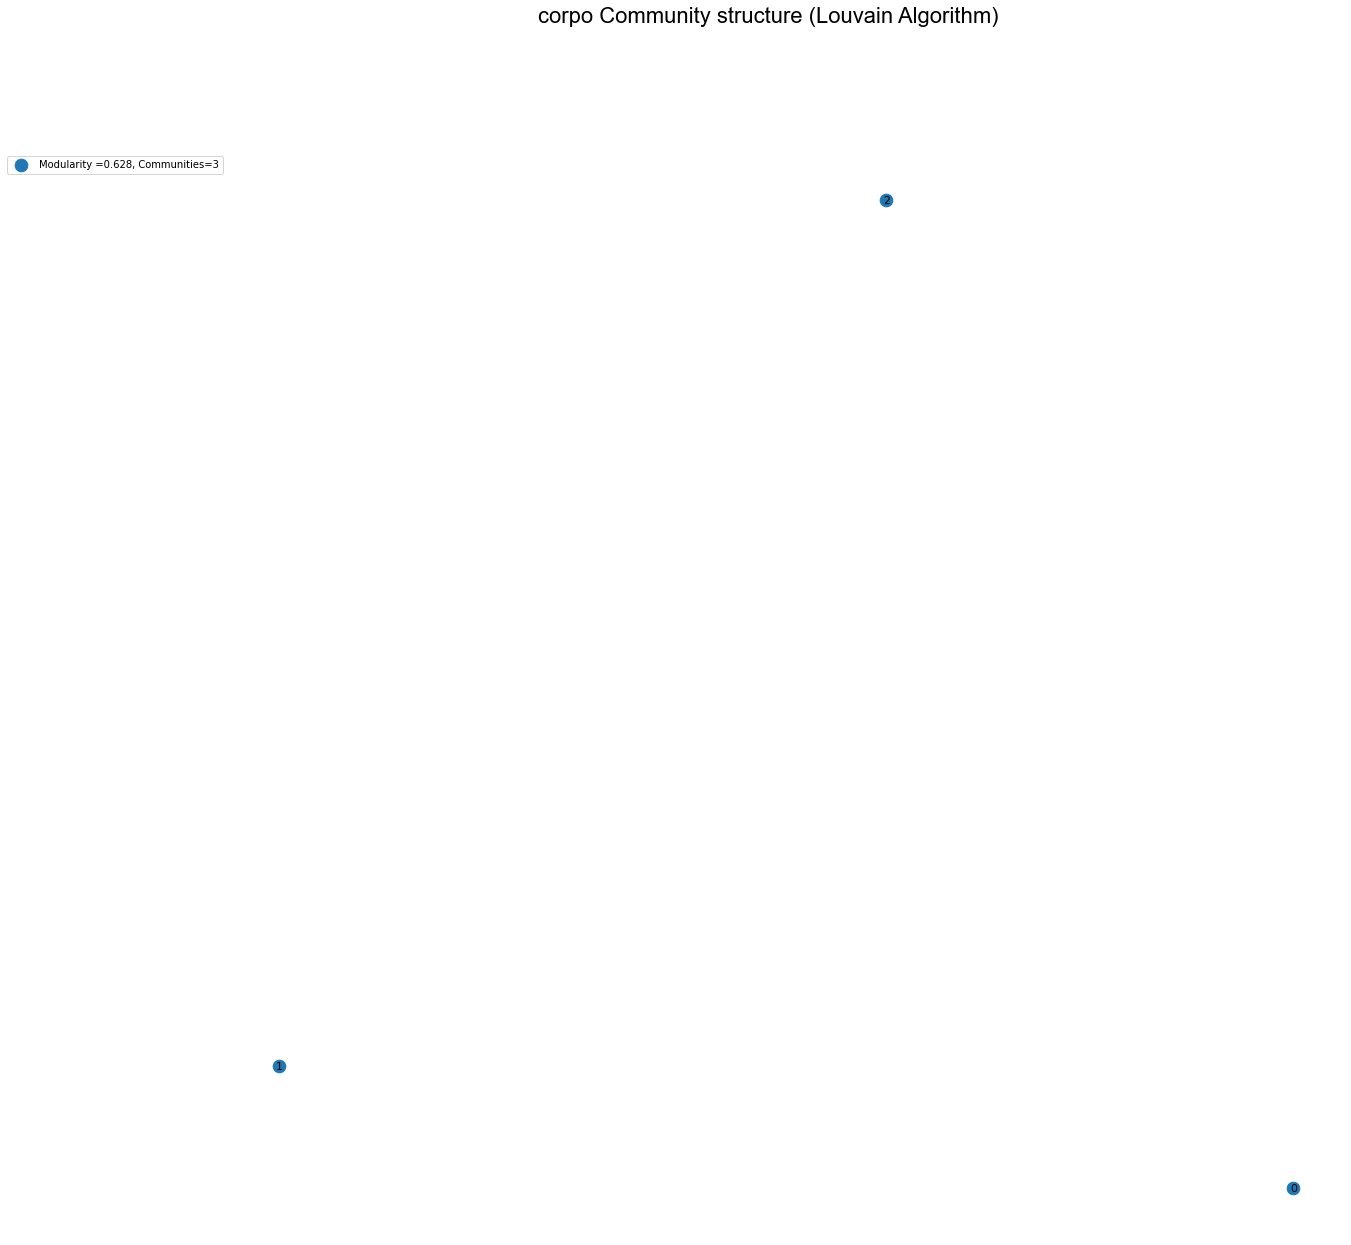

In [63]:
# Creating a new graph to represent the communities created by the Louvain algorithm
plt.rcParams['figure.figsize']= [20, 20]
corpo_comm=nx.Graph()

# Populating the data from the node dictionary created earlier
corpo_comm.add_nodes_from(corpo_nodes)

# Calculating modularity and the total number of communities
corpo_mod=community.modularity(corpo_partition,corpo_graph)
print("Modularity: ", corpo_mod)
print("Total number of Communities=", len(corpo_comm.nodes()))

# Creating the Graph and also calculating Modularity
plt.rcParams['figure.figsize']= [20, 20]
corpo_pos=nx.spring_layout(corpo_comm)
nx.draw_networkx(corpo_comm, corpo_pos, with_labels=True,node_size=160,font_size=11,label='Modularity =' + str(round(corpo_mod,3)) +
                    ', Communities=' + str(len(corpo_comm.nodes())))
plt.suptitle('corpo Community structure (Louvain Algorithm)',fontsize=22,fontname='Arial')
plt.box(on=None)
plt.axis('off')
plt.legend(bbox_to_anchor=(0,1), loc='best', ncol=1)
plt.savefig('corpo_louvain.png',dpi=400, bbox_inches='tight')

In [64]:
# louvain algorithm startup
startup_partition=community.best_partition(startup_graph, weight='freq')
print('Completed Louvain algorithm .. . . ' )
startup_values=[startup_partition.get(node) for node in startup_graph.nodes()]
startup_com=startup_partition.values()

# Creating a dictionary like {community_number:list_of_participants}
startup_nodes={}

# Populating the dictionary with items
for each_item in startup_partition.items():
    startup_community_num=each_item[1]
    startup_community_node=each_item[0]
    if startup_community_num in startup_nodes:
        startup_value=startup_nodes.get(startup_community_num) + ' | ' + str(startup_community_node)
        startup_nodes.update({startup_community_num:startup_value})
    else:
        startup_nodes.update({startup_community_num:startup_community_node})

# Creating a dataframe from the diet, and getting the output into excel
startup_community_df=pd.DataFrame.from_dict(startup_nodes, orient='index',columns=['users'])
startup_community_df.index.rename('startup_community_num' , inplace=True)
startup_community_df.to_csv('startup_louvain_communities.csv')

Completed Louvain algorithm .. . . 


Modularity:  0.4574512639796688
Total number of Communities= 3


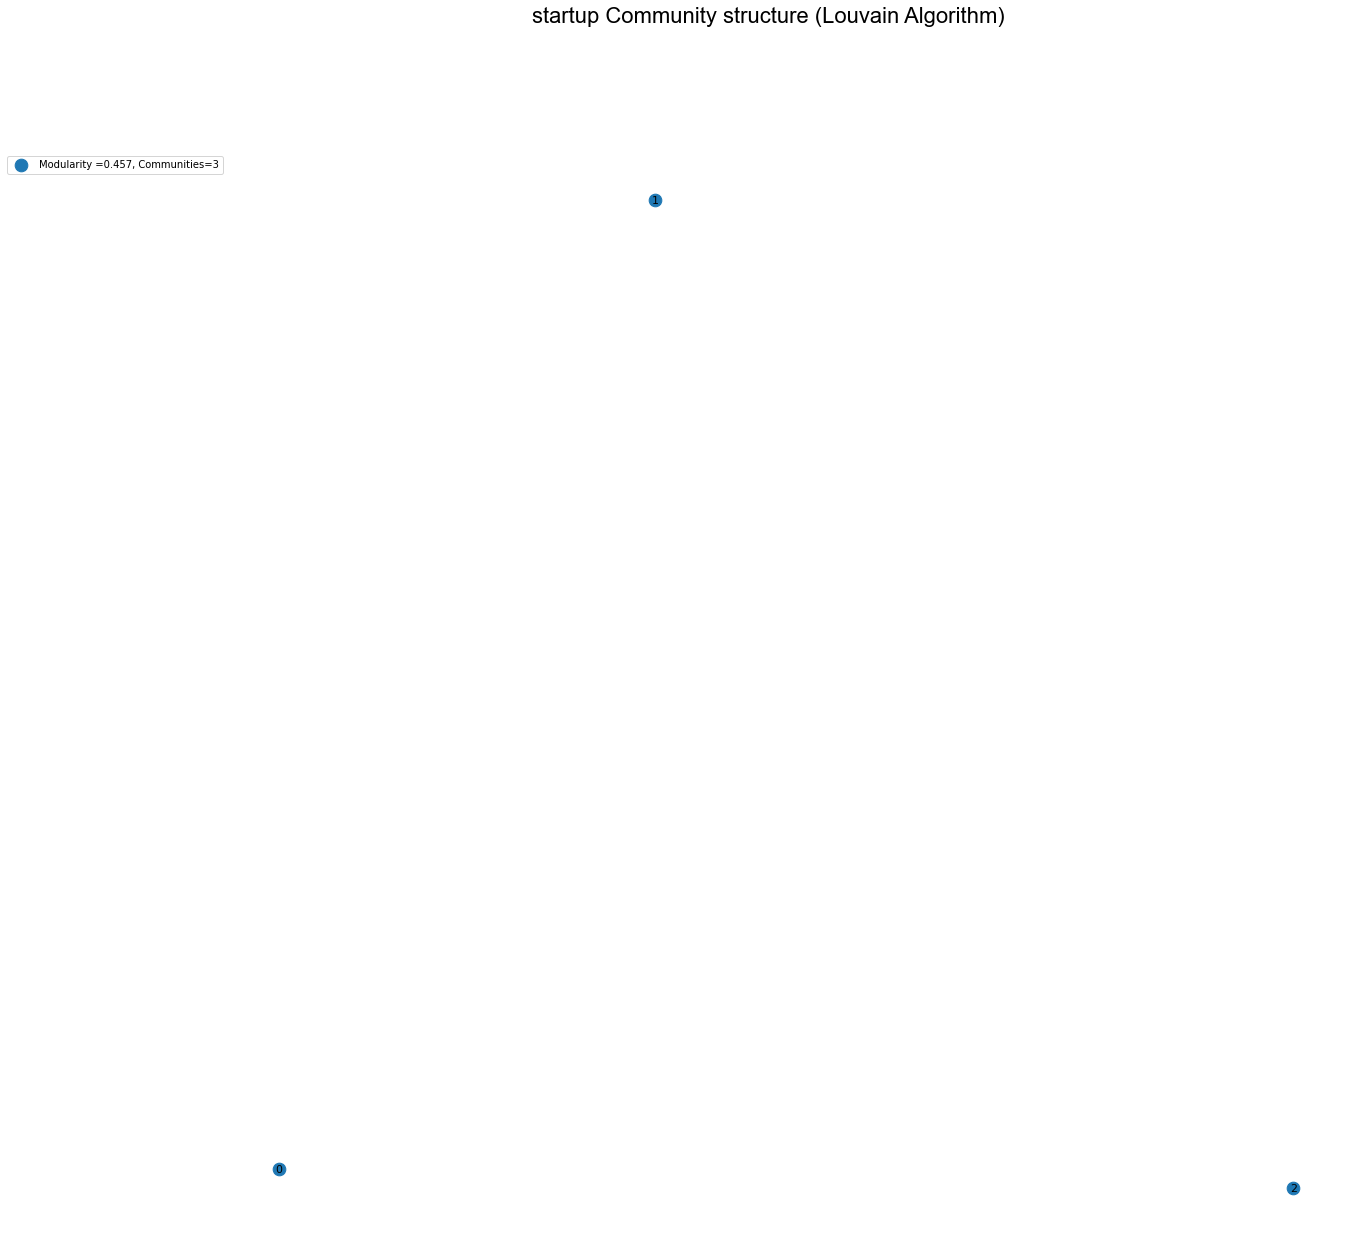

In [65]:
# Creating a new graph to represent the communities created by the Louvain algorithm
plt.rcParams['figure.figsize']= [20, 20]
startup_comm=nx.Graph()

# Populating the data from the node dictionary created earlier
startup_comm.add_nodes_from(startup_nodes)

# Calculating modularity and the total number of communities
startup_mod=community.modularity(startup_partition,startup_graph)
print("Modularity: ", startup_mod)
print("Total number of Communities=", len(startup_comm.nodes()))

# Creating the Graph and also calculating Modularity
plt.rcParams['figure.figsize']= [20, 20]
startup_pos=nx.spring_layout(startup_comm)
nx.draw_networkx(startup_comm, startup_pos, with_labels=True,node_size=160,font_size=11,label='Modularity =' + str(round(startup_mod,3)) +
                    ', Communities=' + str(len(startup_comm.nodes())))
plt.suptitle('startup Community structure (Louvain Algorithm)',fontsize=22,fontname='Arial')
plt.box(on=None)
plt.axis('off')
plt.legend(bbox_to_anchor=(0,1), loc='best', ncol=1)
plt.savefig('startup_louvain.png',dpi=400, bbox_inches='tight')

In [68]:
# louvain algorithm academic
academic_partition=community.best_partition(academic_graph, weight='freq')
print('Completed Louvain algorithm .. . . ' )
academic_values=[academic_partition.get(node) for node in academic_graph.nodes()]
academic_com=academic_partition.values()

# Creating a dictionary like {community_number:list_of_participants}
academic_nodes={}

# Populating the dictionary with items
for each_item in academic_partition.items():
    academic_community_num=each_item[1]
    academic_community_node=each_item[0]
    if academic_community_num in academic_nodes:
        academic_value=academic_nodes.get(academic_community_num) + ' | ' + str(academic_community_node)
        academic_nodes.update({academic_community_num:academic_value})
    else:
        academic_nodes.update({academic_community_num:academic_community_node})

# Creating a dataframe from the diet, and getting the output into excel
academic_community_df=pd.DataFrame.from_dict(academic_nodes, orient='index',columns=['users'])
academic_community_df.index.rename('academic_community_num' , inplace=True)
academic_community_df.to_csv('academic_louvain_communities.csv')

Completed Louvain algorithm .. . . 


Modularity:  0.2689460093003899
Total number of Communities= 3


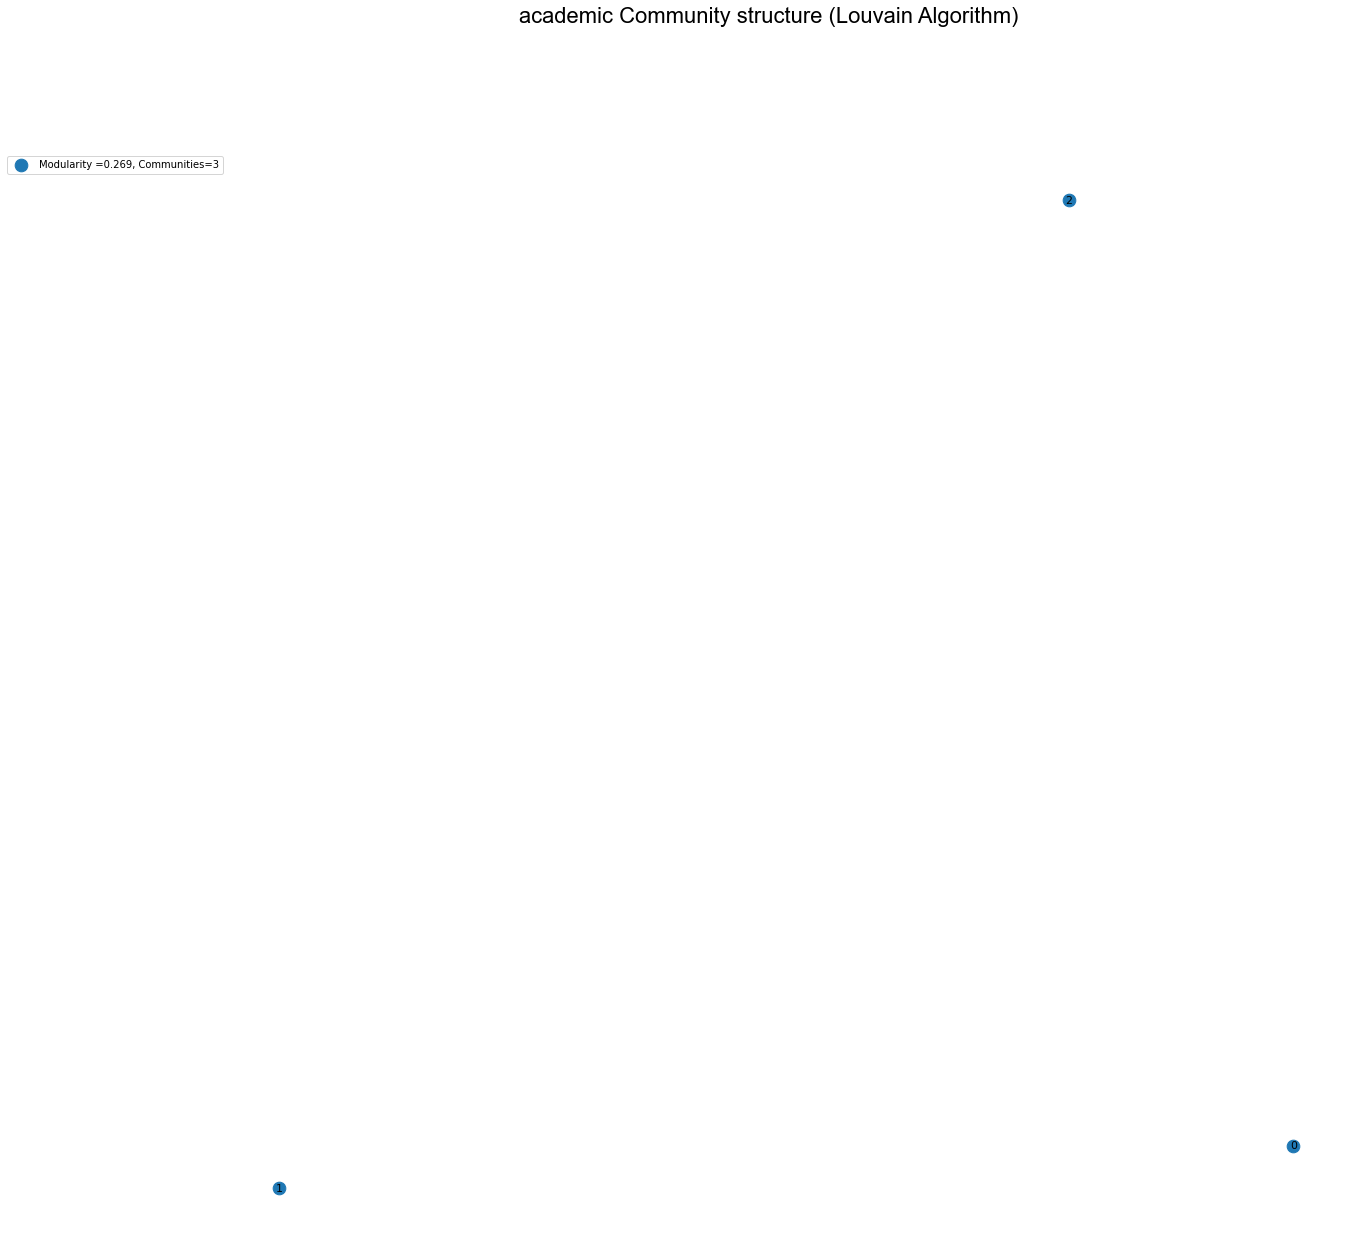

In [69]:
# Creating a new graph to represent the communities created by the Louvain algorithm
plt.rcParams['figure.figsize']= [20, 20]
academic_comm=nx.Graph()

# Populating the data from the node dictionary created earlier
academic_comm.add_nodes_from(academic_nodes)

# Calculating modularity and the total number of communities
academic_mod=community.modularity(academic_partition,academic_graph)
print("Modularity: ", academic_mod)
print("Total number of Communities=", len(academic_comm.nodes()))

# Creating the Graph and also calculating Modularity
plt.rcParams['figure.figsize']= [20, 20]
academic_pos=nx.spring_layout(academic_comm)
nx.draw_networkx(academic_comm, academic_pos, with_labels=True,node_size=160,font_size=11,label='Modularity =' + str(round(academic_mod,3)) +
                    ', Communities=' + str(len(academic_comm.nodes())))
plt.suptitle('academic Community structure (Louvain Algorithm)',fontsize=22,fontname='Arial')
plt.box(on=None)
plt.axis('off')
plt.legend(bbox_to_anchor=(0,1), loc='best', ncol=1)
plt.savefig('academic_louvain.png',dpi=400, bbox_inches='tight')

In [70]:
# louvain algorithm civil
civil_partition=community.best_partition(civil_graph, weight='freq')
print('Completed Louvain algorithm .. . . ' )
civil_values=[civil_partition.get(node) for node in civil_graph.nodes()]
civil_com=civil_partition.values()

# Creating a dictionary like {community_number:list_of_participants}
civil_nodes={}

# Populating the dictionary with items
for each_item in civil_partition.items():
    civil_community_num=each_item[1]
    civil_community_node=each_item[0]
    if civil_community_num in civil_nodes:
        civil_value=civil_nodes.get(civil_community_num) + ' | ' + str(civil_community_node)
        civil_nodes.update({civil_community_num:civil_value})
    else:
        civil_nodes.update({civil_community_num:civil_community_node})

# Creating a dataframe from the diet, and getting the output into excel
civil_community_df=pd.DataFrame.from_dict(civil_nodes, orient='index',columns=['users'])
civil_community_df.index.rename('civil_community_num' , inplace=True)
civil_community_df.to_csv('civil_louvain_communities.csv')

Completed Louvain algorithm .. . . 


Modularity:  0.415913183939426
Total number of Communities= 3


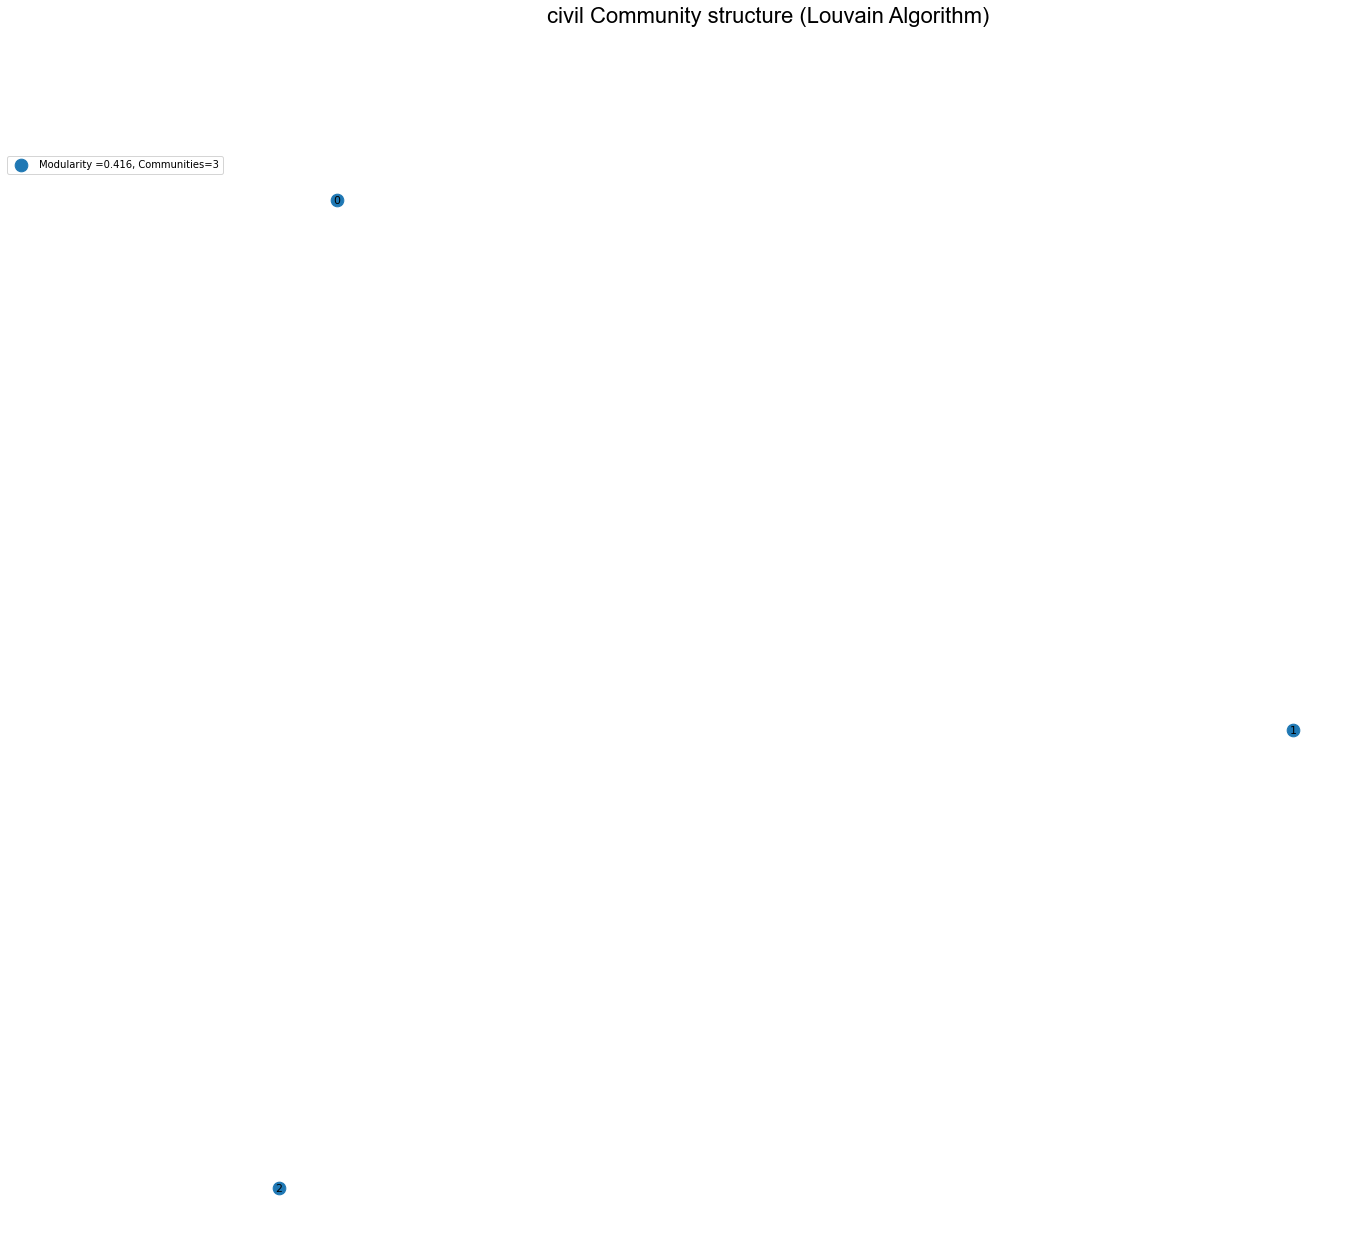

In [71]:
# Creating a new graph to represent the communities created by the Louvain algorithm
plt.rcParams['figure.figsize']= [20, 20]
civil_comm=nx.Graph()

# Populating the data from the node dictionary created earlier
civil_comm.add_nodes_from(civil_nodes)

# Calculating modularity and the total number of communities
civil_mod=community.modularity(civil_partition,civil_graph)
print("Modularity: ", civil_mod)
print("Total number of Communities=", len(civil_comm.nodes()))

# Creating the Graph and also calculating Modularity
plt.rcParams['figure.figsize']= [20, 20]
civil_pos=nx.spring_layout(civil_comm)
nx.draw_networkx(civil_comm, civil_pos, with_labels=True,node_size=160,font_size=11,label='Modularity =' + str(round(civil_mod,3)) +
                    ', Communities=' + str(len(civil_comm.nodes())))
plt.suptitle('civil Community structure (Louvain Algorithm)',fontsize=22,fontname='Arial')
plt.box(on=None)
plt.axis('off')
plt.legend(bbox_to_anchor=(0,1), loc='best', ncol=1)
plt.savefig('civil_louvain.png',dpi=400, bbox_inches='tight')

In [72]:
# louvain algorithm media
media_partition=community.best_partition(media_graph, weight='freq')
print('Completed Louvain algorithm .. . . ' )
media_values=[media_partition.get(node) for node in media_graph.nodes()]
media_com=media_partition.values()

# Creating a dictionary like {community_number:list_of_participants}
media_nodes={}

# Populating the dictionary with items
for each_item in media_partition.items():
    media_community_num=each_item[1]
    media_community_node=each_item[0]
    if media_community_num in media_nodes:
        media_value=media_nodes.get(media_community_num) + ' | ' + str(media_community_node)
        media_nodes.update({media_community_num:media_value})
    else:
        media_nodes.update({media_community_num:media_community_node})

# Creating a dataframe from the diet, and getting the output into excel
media_community_df=pd.DataFrame.from_dict(media_nodes, orient='index',columns=['users'])
media_community_df.index.rename('media_community_num' , inplace=True)
media_community_df.to_csv('media_louvain_communities.csv')

Completed Louvain algorithm .. . . 


Modularity:  0.4329751325680322
Total number of Communities= 3


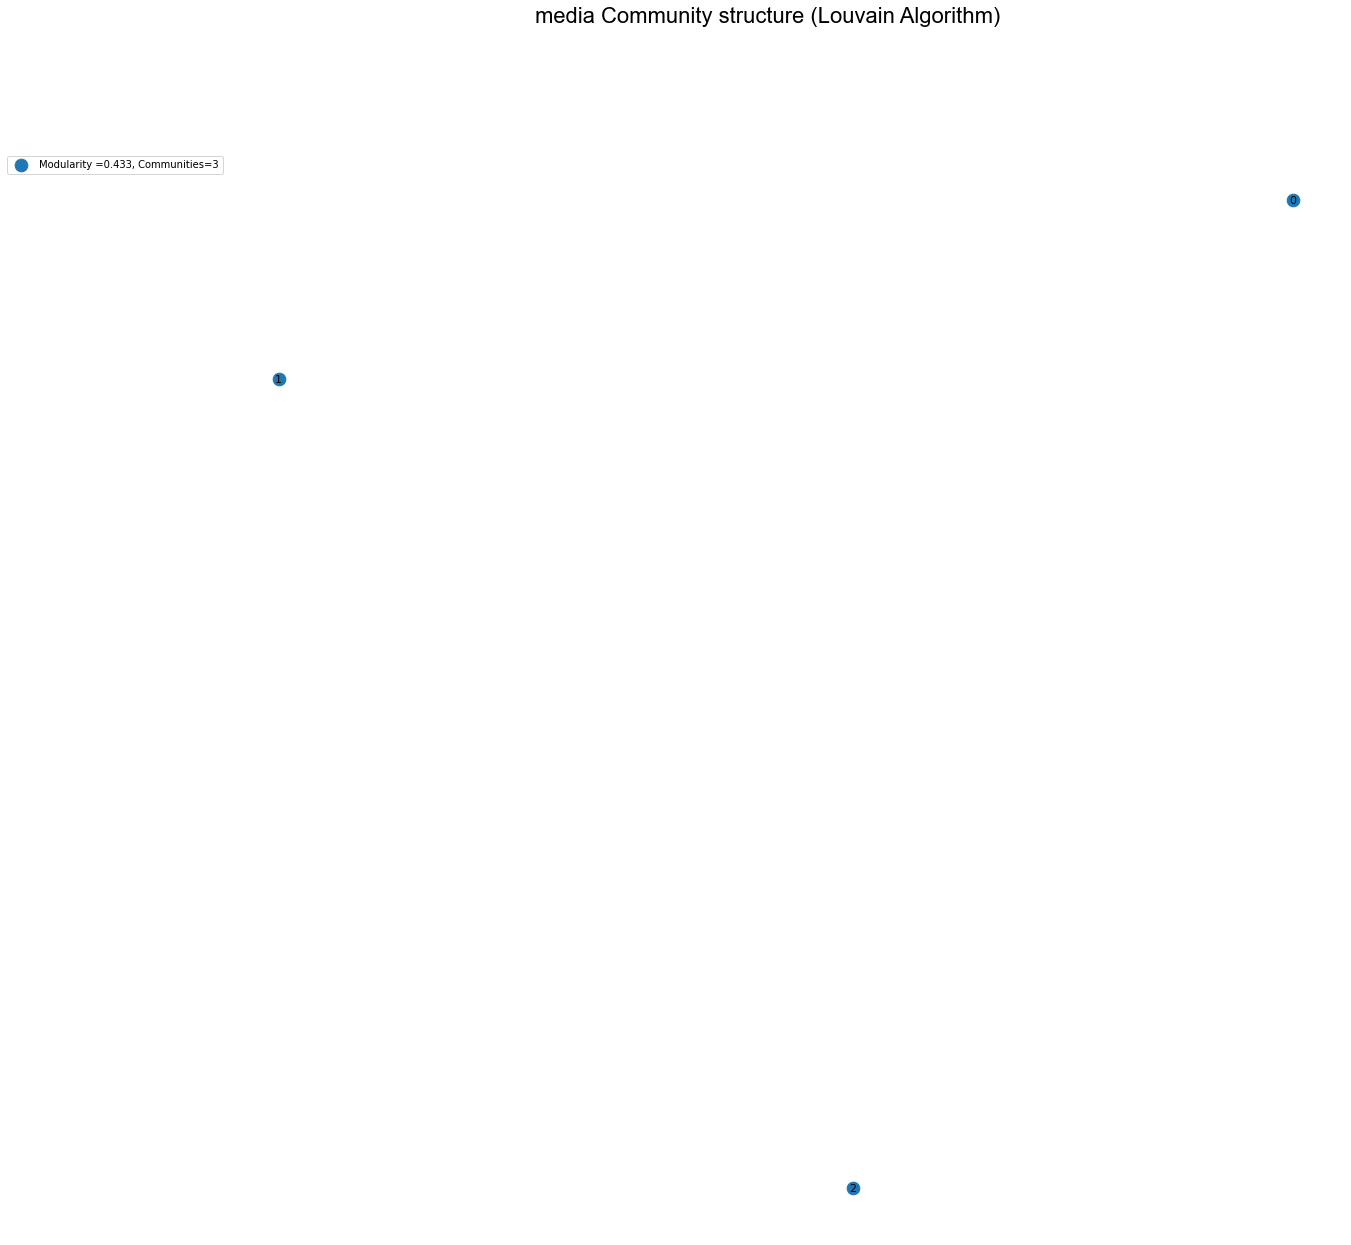

In [73]:
# Creating a new graph to represent the communities created by the Louvain algorithm
plt.rcParams['figure.figsize']= [20, 20]
media_comm=nx.Graph()

# Populating the data from the node dictionary created earlier
media_comm.add_nodes_from(media_nodes)

# Calculating modularity and the total number of communities
media_mod=community.modularity(media_partition,media_graph)
print("Modularity: ", media_mod)
print("Total number of Communities=", len(media_comm.nodes()))

# Creating the Graph and also calculating Modularity
plt.rcParams['figure.figsize']= [20, 20]
media_pos=nx.spring_layout(media_comm)
nx.draw_networkx(media_comm, media_pos, with_labels=True,node_size=160,font_size=11,label='Modularity =' + str(round(media_mod,3)) +
                    ', Communities=' + str(len(media_comm.nodes())))
plt.suptitle('media Community structure (Louvain Algorithm)',fontsize=22,fontname='Arial')
plt.box(on=None)
plt.axis('off')
plt.legend(bbox_to_anchor=(0,1), loc='best', ncol=1)
plt.savefig('media_louvain.png',dpi=400, bbox_inches='tight')

In [13]:
num_louvain = [1609,1331,704,3,3,3,3,3,3]
network_measures['louvain_communities'] = num_louvain

In [14]:
modularities = [0.8746511669871416,0.8108895324302012,0.7710235869374245,0.44217309753304235,0.6283111807029824,0.4574512639796688,0.2689460093003899,0.415913183939426,0.4329751325680322]
network_measures['louvain_modularity'] = modularities

# 3. Maximal Cliques

In [ ]:
# Defining a circle that can be drawn around each community
def draw_circle_around_clique(clique,coords):
    dist=0
    temp_dist=0
    center=[0 for i in range(2)]
    color=next(colors)
    for a in clique:
        for b in clique:
            temp_dist=(coords[a][0]-coords[b][0])**2+(coords[a][1]-coords[b][1])**2
            if temp_dist>dist:
                dist=temp_dist
                for i in range(2):
                    center[i]=(coords[a][i]+coords[b][i])/2
    rad=dist**0.5/2
    cir=plt.Circle((center[0],center[1]),radius=rad*1.3,fill=False,color=color)
    plt.gca().add_patch(cir)
    plt.axis('scaled')
    return color

# Setting a cycle of colors,
global colors, hatches
colors=it.cycle('b')

In [7]:
# Maximal Cliques of taipei
a=nx.find_cliques(taipei_graph)
i=0

# For each clique, print the total number of communities
for clique in a:
    i+=1
total_comm_max_cl=i
print('Total number of communities: ',total_comm_max_cl)

Total number of communities:  12280


maximal number of cliques: 12227


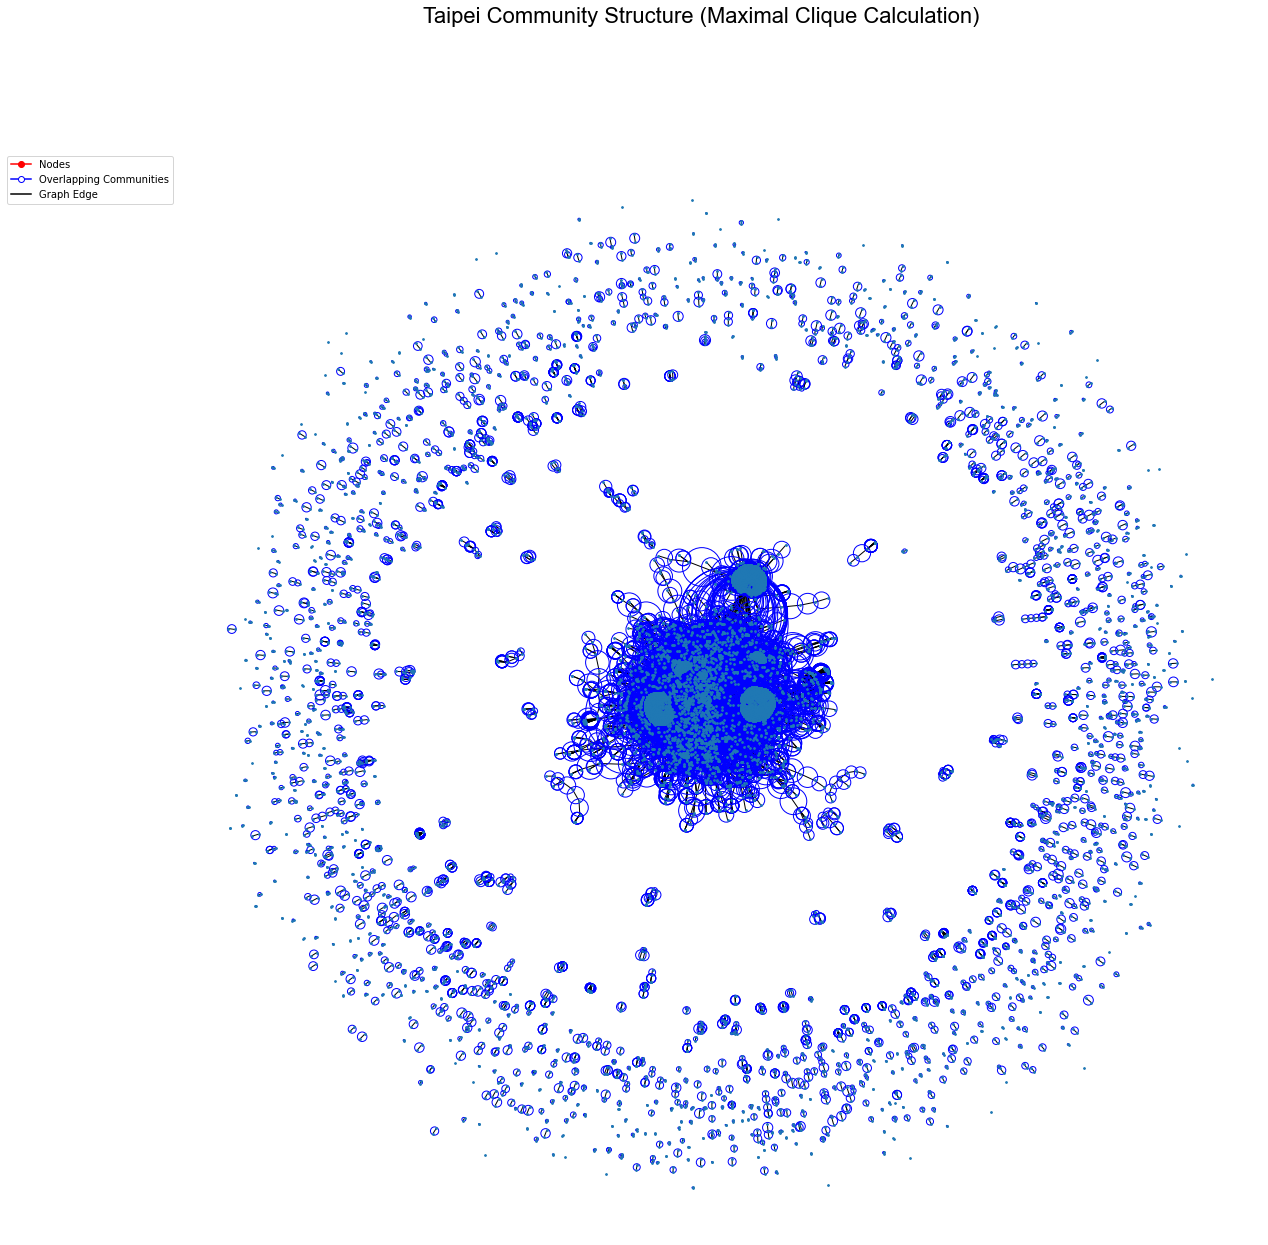

In [71]:
# Position nodes using Fruchterman-Reingold force-directed algorithm
taipei_pos = nx.spring_layout(taipei_graph)

# Remove "len(clique)>2" if you're interested in maxcliques with 2 edges
cliques=[clique for clique in nx.find_cliques(taipei_graph) if len(clique)>1]
print('maximal number of cliques:', len(cliques))

# Draw the graph
plt.rcParams['figure.figsize']= [20, 20]
nx.draw_networkx(taipei_graph,taipei_pos, node_size=3, with_labels=False)
for clique in cliques:
    nx.draw_networkx_nodes(taipei_graph,taipei_pos,nodelist=clique,node_color=draw_circle_around_clique(clique,taipei_pos),node_size=1000, alpha=0)
plt.suptitle('Taipei Community Structure (Maximal Clique Calculation)',fontsize=22, fontname='Arial')
plt.box(on=None)
plt.axis('off')
         
red_patch=mpatches.Patch(color='r', label='Nodes')
#blue_patch = plt.Circle(color='b', label='Overlapping Communities', fill=False)

red_patch=plt.Line2D([],[], color="red", marker='o', markerfacecolor="red",label='Nodes')
blue_patch=plt.Line2D([],[], color="blue", marker='o', markerfacecolor='white',label='Overlapping Communities')
black_patch=plt.Line2D([],[], color="black",label='Graph Edge')
plt.legend(handles=[red_patch,blue_patch, black_patch],bbox_to_anchor=(0,1), loc='best', ncol=1)
plt.savefig('Taipei Cliques.png',dpi=400, bbox_inches='tight')
plt.show()

In [55]:
# Maximal Cliques of telaviv
a=nx.find_cliques(telaviv_graph)
i=0

# For each clique, print the total number of communities
for clique in a:
    i+=1
total_comm_max_cl=i
print('Total number of communities: ',total_comm_max_cl)

Total number of communities:  24879


maximal number of cliques: 24859


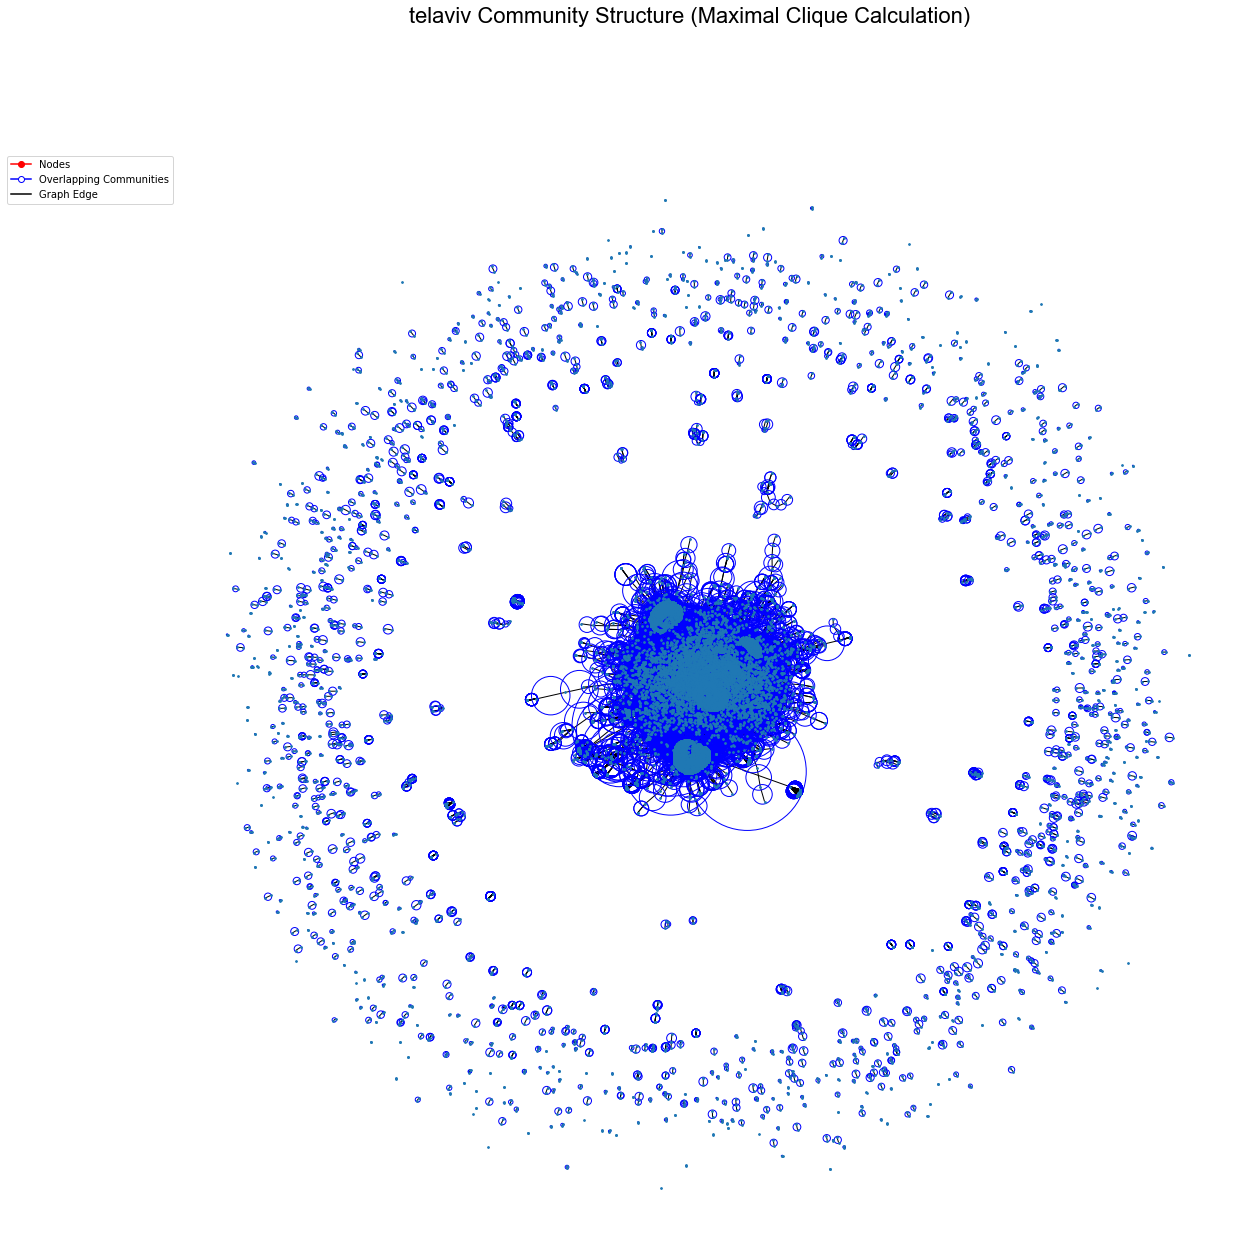

In [56]:
# Position nodes using Fruchterman-Reingold force-directed algorithm
telaviv_pos = nx.spring_layout(telaviv_graph)

# Remove "len(clique)>2" if you're interested in maxcliques with 2 edges
cliques=[clique for clique in nx.find_cliques(telaviv_graph) if len(clique)>1]
print('maximal number of cliques:', len(cliques))

# Draw the graph
plt.rcParams['figure.figsize']= [20, 20]
nx.draw_networkx(telaviv_graph,telaviv_pos, node_size=3, with_labels=False)
for clique in cliques:
    nx.draw_networkx_nodes(telaviv_graph,telaviv_pos,nodelist=clique,node_color=draw_circle_around_clique(clique,telaviv_pos),node_size=1000, alpha=0)
plt.suptitle('telaviv Community Structure (Maximal Clique Calculation)',fontsize=22, fontname='Arial')
plt.box(on=None)
plt.axis('off')
         
red_patch=mpatches.Patch(color='r', label='Nodes')
#blue_patch = plt.Circle(color='b', label='Overlapping Communities', fill=False)

red_patch=plt.Line2D([],[], color="red", marker='o', markerfacecolor="red",label='Nodes')
blue_patch=plt.Line2D([],[], color="blue", marker='o', markerfacecolor='white',label='Overlapping Communities')
black_patch=plt.Line2D([],[], color="black",label='Graph Edge')
plt.legend(handles=[red_patch,blue_patch, black_patch],bbox_to_anchor=(0,1), loc='best', ncol=1)
plt.savefig('telaviv Cliques.png',dpi=400, bbox_inches='tight')
plt.show()

In [57]:
# Maximal Cliques of tallinn
a=nx.find_cliques(tallinn_graph)
i=0

# For each clique, print the total number of communities
for clique in a:
    i+=1
total_comm_max_cl=i
print('Total number of communities: ',total_comm_max_cl)

Total number of communities:  8868


maximal number of cliques: 8857


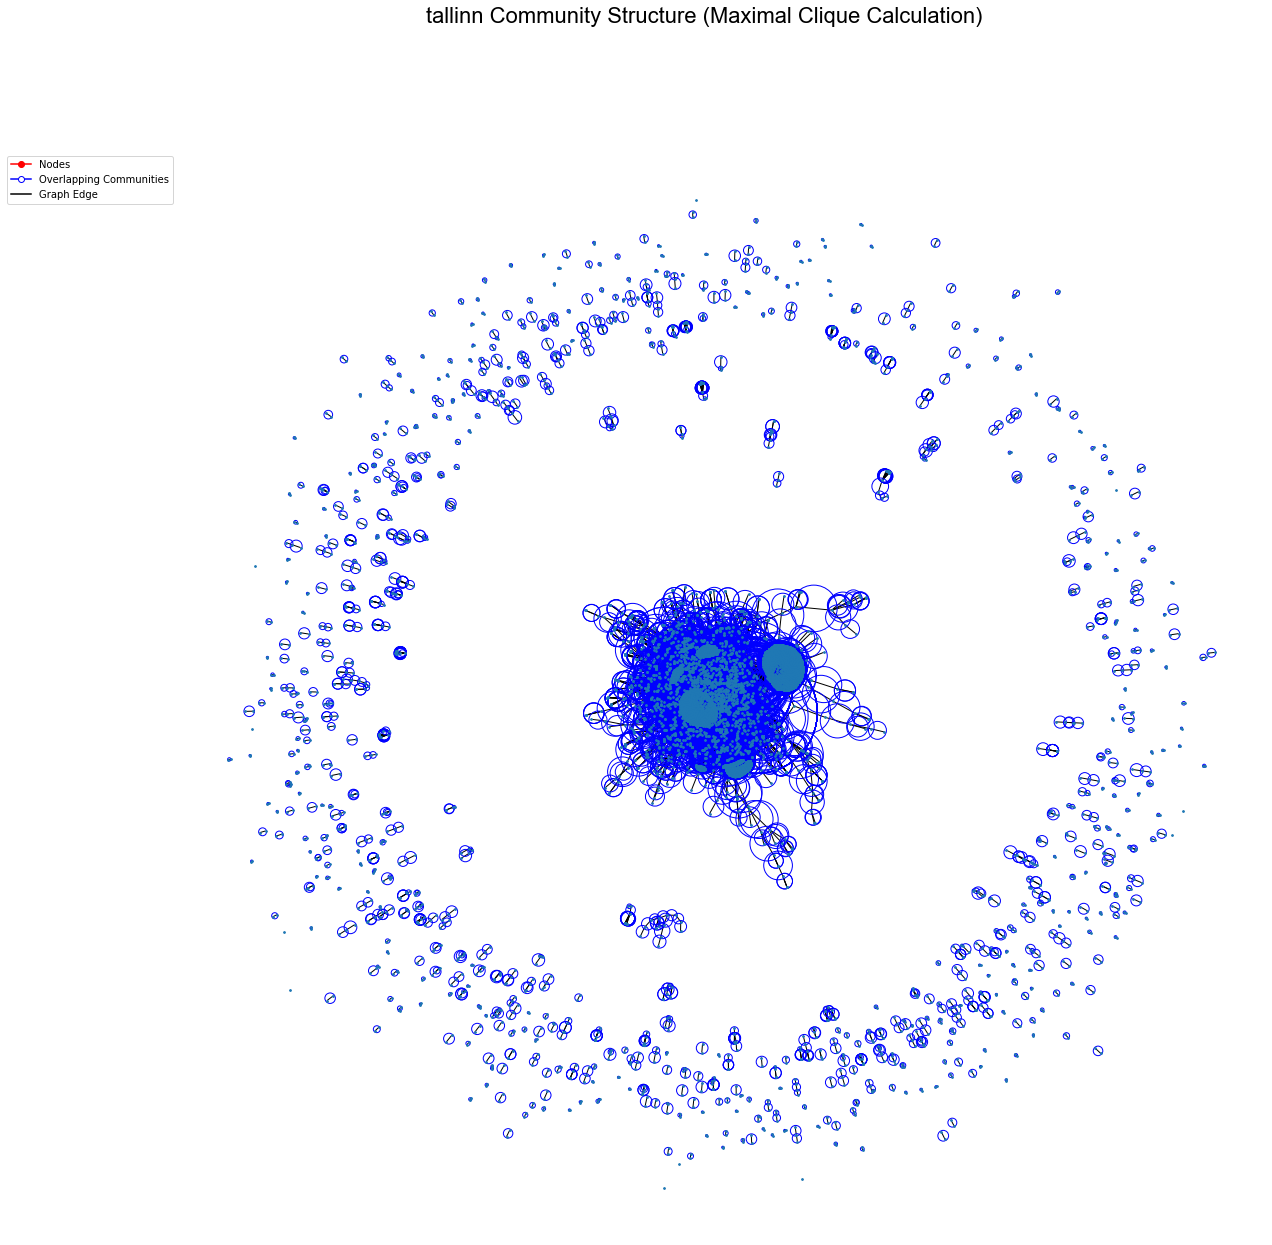

In [58]:
# Position nodes using Fruchterman-Reingold force-directed algorithm
tallinn_pos = nx.spring_layout(tallinn_graph)

# Remove "len(clique)>2" if you're interested in maxcliques with 2 edges
cliques=[clique for clique in nx.find_cliques(tallinn_graph) if len(clique)>1]
print('maximal number of cliques:', len(cliques))

# Draw the graph
plt.rcParams['figure.figsize']= [20, 20]
nx.draw_networkx(tallinn_graph,tallinn_pos, node_size=3, with_labels=False)
for clique in cliques:
    nx.draw_networkx_nodes(tallinn_graph,tallinn_pos,nodelist=clique,node_color=draw_circle_around_clique(clique,tallinn_pos),node_size=1000, alpha=0)
plt.suptitle('tallinn Community Structure (Maximal Clique Calculation)',fontsize=22, fontname='Arial')
plt.box(on=None)
plt.axis('off')
         
red_patch=mpatches.Patch(color='r', label='Nodes')
#blue_patch = plt.Circle(color='b', label='Overlapping Communities', fill=False)

red_patch=plt.Line2D([],[], color="red", marker='o', markerfacecolor="red",label='Nodes')
blue_patch=plt.Line2D([],[], color="blue", marker='o', markerfacecolor='white',label='Overlapping Communities')
black_patch=plt.Line2D([],[], color="black",label='Graph Edge')
plt.legend(handles=[red_patch,blue_patch, black_patch],bbox_to_anchor=(0,1), loc='best', ncol=1)
plt.savefig('tallinn Cliques.png',dpi=400, bbox_inches='tight')
plt.show()

In [59]:
# Maximal Cliques of public
a=nx.find_cliques(public_graph)
i=0

# For each clique, print the total number of communities
for clique in a:
    i+=1
total_comm_max_cl=i
print('Total number of communities: ',total_comm_max_cl)

Total number of communities:  2443


maximal number of cliques: 2443


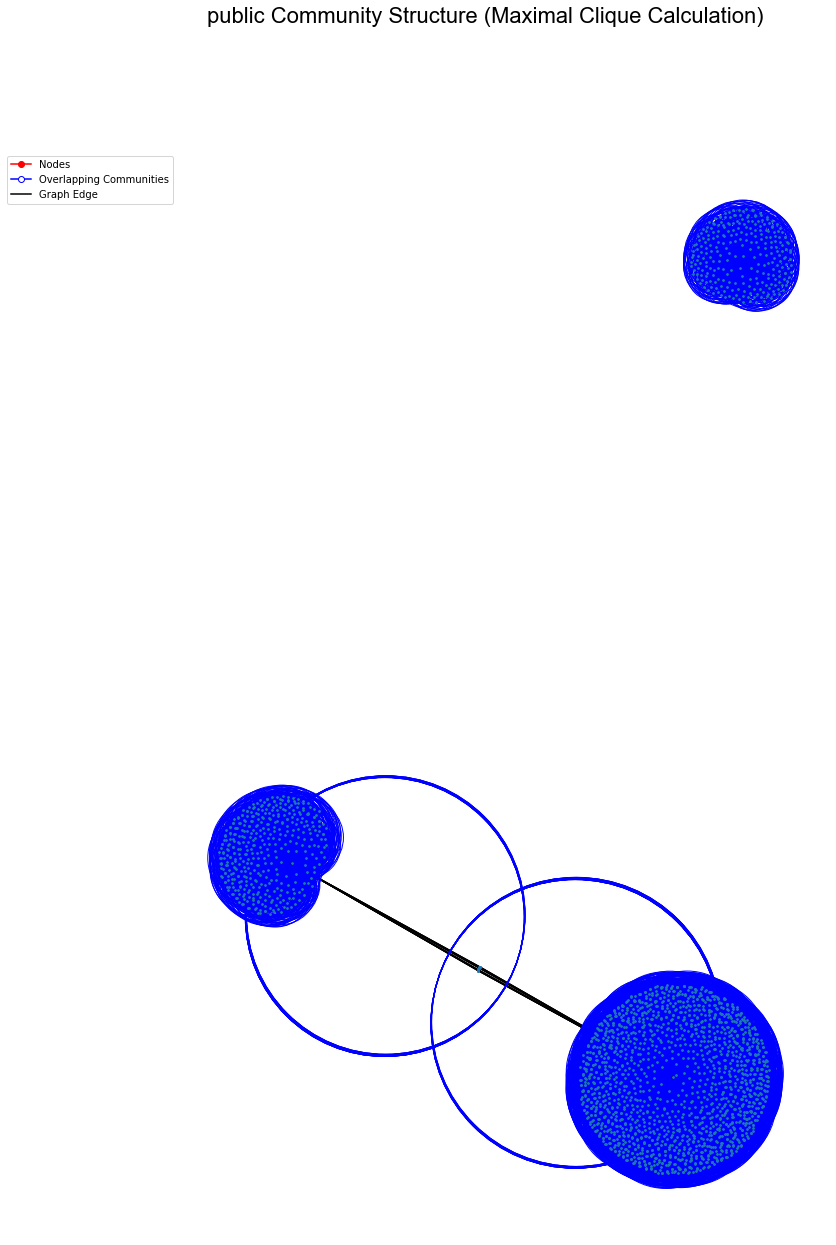

In [60]:
# Position nodes using Fruchterman-Reingold force-directed algorithm
public_pos = nx.spring_layout(public_graph)

# Remove "len(clique)>2" if you're interested in maxcliques with 2 edges
cliques=[clique for clique in nx.find_cliques(public_graph) if len(clique)>1]
print('maximal number of cliques:', len(cliques))

# Draw the graph
plt.rcParams['figure.figsize']= [20, 20]
nx.draw_networkx(public_graph,public_pos, node_size=3, with_labels=False)
for clique in cliques:
    nx.draw_networkx_nodes(public_graph,public_pos,nodelist=clique,node_color=draw_circle_around_clique(clique,public_pos),node_size=1000, alpha=0)
plt.suptitle('public Community Structure (Maximal Clique Calculation)',fontsize=22, fontname='Arial')
plt.box(on=None)
plt.axis('off')
         
red_patch=mpatches.Patch(color='r', label='Nodes')
#blue_patch = plt.Circle(color='b', label='Overlapping Communities', fill=False)

red_patch=plt.Line2D([],[], color="red", marker='o', markerfacecolor="red",label='Nodes')
blue_patch=plt.Line2D([],[], color="blue", marker='o', markerfacecolor='white',label='Overlapping Communities')
black_patch=plt.Line2D([],[], color="black",label='Graph Edge')
plt.legend(handles=[red_patch,blue_patch, black_patch],bbox_to_anchor=(0,1), loc='best', ncol=1)
plt.savefig('public Cliques.png',dpi=400, bbox_inches='tight')
plt.show()

In [61]:
# Maximal Cliques of corpo
a=nx.find_cliques(corpo_graph)
i=0

# For each clique, print the total number of communities
for clique in a:
    i+=1
total_comm_max_cl=i
print('Total number of communities: ',total_comm_max_cl)

Total number of communities:  7987


maximal number of cliques: 7987


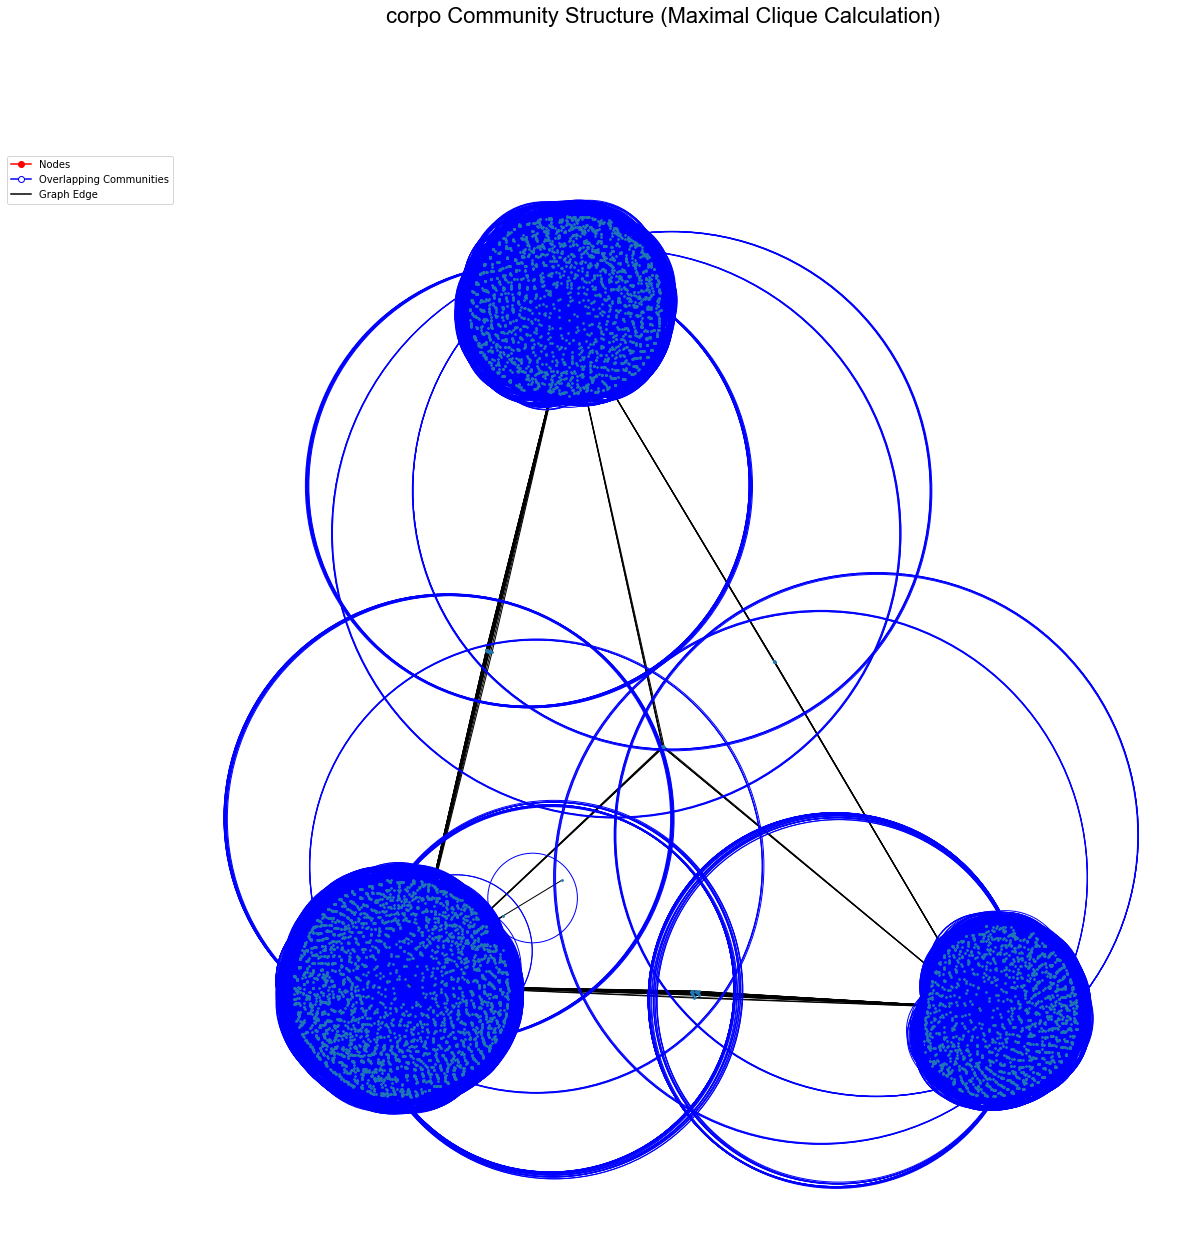

In [62]:
# Position nodes using Fruchterman-Reingold force-directed algorithm
corpo_pos = nx.spring_layout(corpo_graph)

# Remove "len(clique)>2" if you're interested in maxcliques with 2 edges
cliques=[clique for clique in nx.find_cliques(corpo_graph) if len(clique)>1]
print('maximal number of cliques:', len(cliques))

# Draw the graph
plt.rcParams['figure.figsize']= [20, 20]
nx.draw_networkx(corpo_graph,corpo_pos, node_size=3, with_labels=False)
for clique in cliques:
    nx.draw_networkx_nodes(corpo_graph,corpo_pos,nodelist=clique,node_color=draw_circle_around_clique(clique,corpo_pos),node_size=1000, alpha=0)
plt.suptitle('corpo Community Structure (Maximal Clique Calculation)',fontsize=22, fontname='Arial')
plt.box(on=None)
plt.axis('off')
         
red_patch=mpatches.Patch(color='r', label='Nodes')
#blue_patch = plt.Circle(color='b', label='Overlapping Communities', fill=False)

red_patch=plt.Line2D([],[], color="red", marker='o', markerfacecolor="red",label='Nodes')
blue_patch=plt.Line2D([],[], color="blue", marker='o', markerfacecolor='white',label='Overlapping Communities')
black_patch=plt.Line2D([],[], color="black",label='Graph Edge')
plt.legend(handles=[red_patch,blue_patch, black_patch],bbox_to_anchor=(0,1), loc='best', ncol=1)
plt.savefig('corpo Cliques.png',dpi=400, bbox_inches='tight')
plt.show()

In [63]:
# Maximal Cliques of startup
a=nx.find_cliques(startup_graph)
i=0

# For each clique, print the total number of communities
for clique in a:
    i+=1
total_comm_max_cl=i
print('Total number of communities: ',total_comm_max_cl)

Total number of communities:  8190


maximal number of cliques: 8190


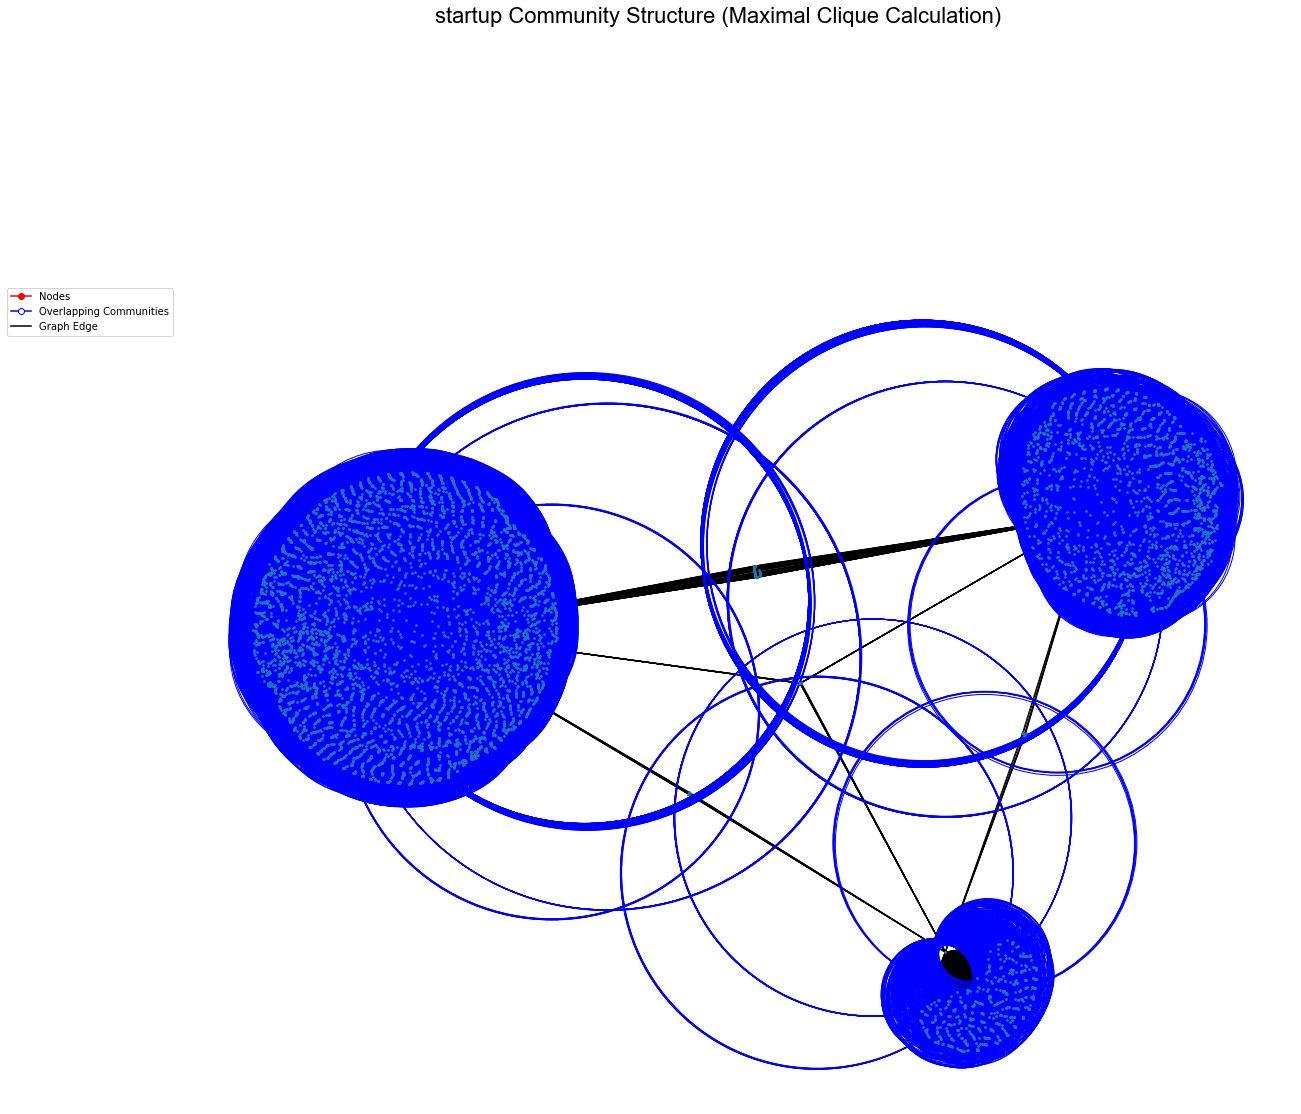

In [64]:
# Position nodes using Fruchterman-Reingold force-directed algorithm
startup_pos = nx.spring_layout(startup_graph)

# Remove "len(clique)>2" if you're interested in maxcliques with 2 edges
cliques=[clique for clique in nx.find_cliques(startup_graph) if len(clique)>1]
print('maximal number of cliques:', len(cliques))

# Draw the graph
plt.rcParams['figure.figsize']= [20, 20]
nx.draw_networkx(startup_graph,startup_pos, node_size=3, with_labels=False)
for clique in cliques:
    nx.draw_networkx_nodes(startup_graph,startup_pos,nodelist=clique,node_color=draw_circle_around_clique(clique,startup_pos),node_size=1000, alpha=0)
plt.suptitle('startup Community Structure (Maximal Clique Calculation)',fontsize=22, fontname='Arial')
plt.box(on=None)
plt.axis('off')
         
red_patch=mpatches.Patch(color='r', label='Nodes')
#blue_patch = plt.Circle(color='b', label='Overlapping Communities', fill=False)

red_patch=plt.Line2D([],[], color="red", marker='o', markerfacecolor="red",label='Nodes')
blue_patch=plt.Line2D([],[], color="blue", marker='o', markerfacecolor='white',label='Overlapping Communities')
black_patch=plt.Line2D([],[], color="black",label='Graph Edge')
plt.legend(handles=[red_patch,blue_patch, black_patch],bbox_to_anchor=(0,1), loc='best', ncol=1)
plt.savefig('startup Cliques.png',dpi=400, bbox_inches='tight')
plt.show()

In [65]:
# Maximal Cliques of academic
a=nx.find_cliques(academic_graph)
i=0

# For each clique, print the total number of communities
for clique in a:
    i+=1
total_comm_max_cl=i
print('Total number of communities: ',total_comm_max_cl)

Total number of communities:  4284


maximal number of cliques: 4284


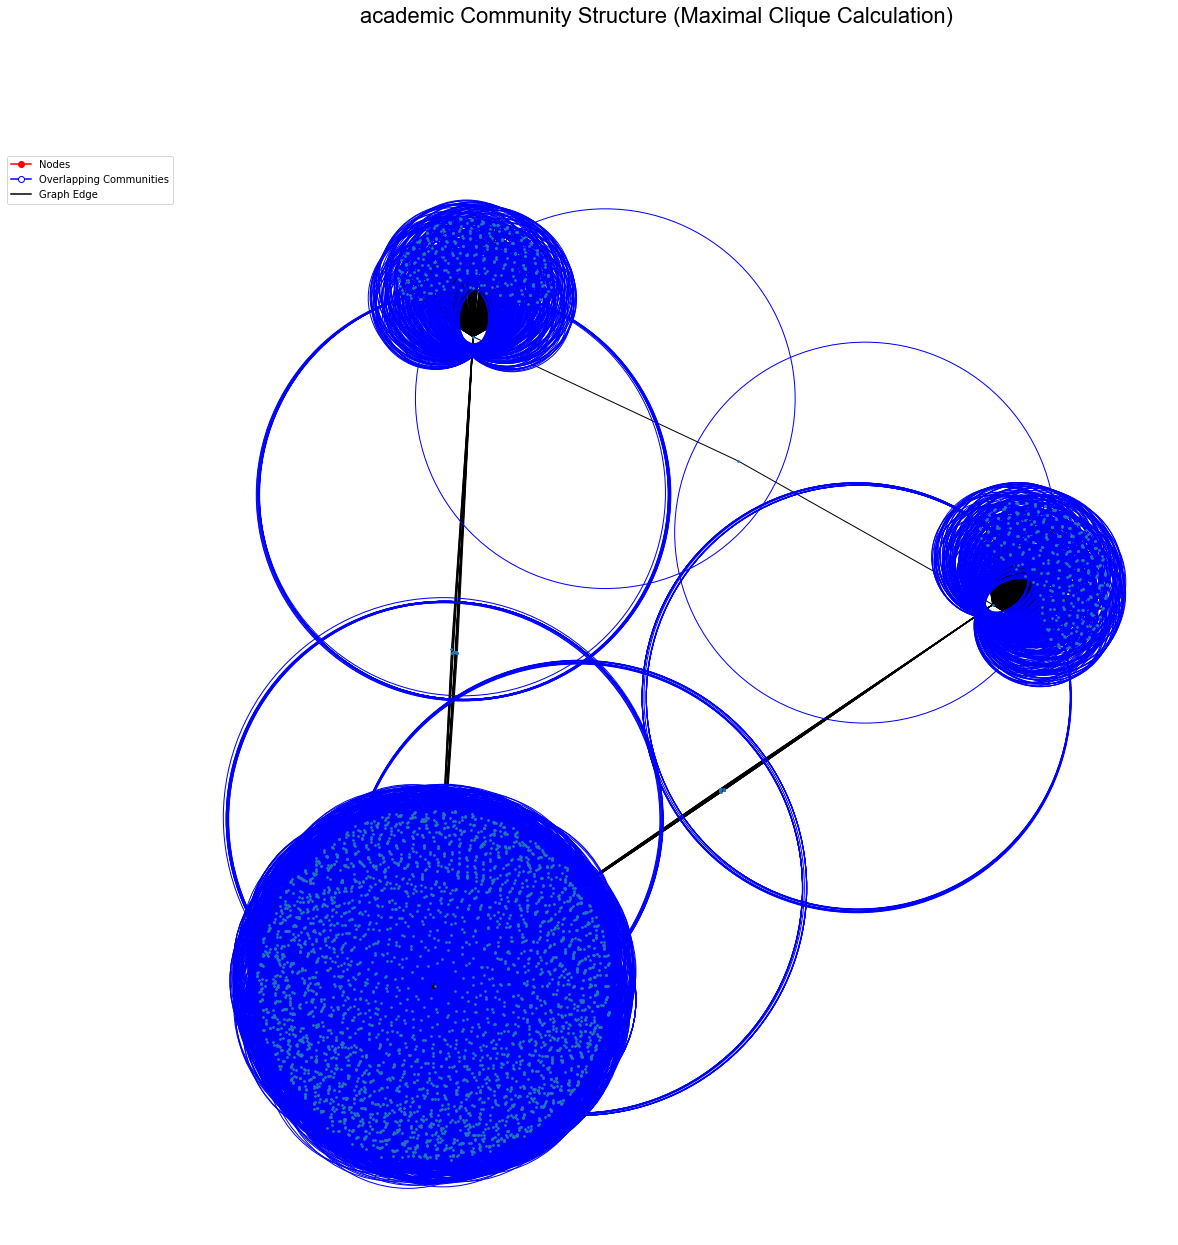

In [66]:
# Position nodes using Fruchterman-Reingold force-directed algorithm
academic_pos = nx.spring_layout(academic_graph)

# Remove "len(clique)>2" if you're interested in maxcliques with 2 edges
cliques=[clique for clique in nx.find_cliques(academic_graph) if len(clique)>1]
print('maximal number of cliques:', len(cliques))

# Draw the graph
plt.rcParams['figure.figsize']= [20, 20]
nx.draw_networkx(academic_graph,academic_pos, node_size=3, with_labels=False)
for clique in cliques:
    nx.draw_networkx_nodes(academic_graph,academic_pos,nodelist=clique,node_color=draw_circle_around_clique(clique,academic_pos),node_size=1000, alpha=0)
plt.suptitle('academic Community Structure (Maximal Clique Calculation)',fontsize=22, fontname='Arial')
plt.box(on=None)
plt.axis('off')
         
red_patch=mpatches.Patch(color='r', label='Nodes')
#blue_patch = plt.Circle(color='b', label='Overlapping Communities', fill=False)

red_patch=plt.Line2D([],[], color="red", marker='o', markerfacecolor="red",label='Nodes')
blue_patch=plt.Line2D([],[], color="blue", marker='o', markerfacecolor='white',label='Overlapping Communities')
black_patch=plt.Line2D([],[], color="black",label='Graph Edge')
plt.legend(handles=[red_patch,blue_patch, black_patch],bbox_to_anchor=(0,1), loc='best', ncol=1)
plt.savefig('academic Cliques.png',dpi=400, bbox_inches='tight')
plt.show()

In [68]:
# Maximal Cliques of civil
a=nx.find_cliques(civil_graph)
i=0

# For each clique, print the total number of communities
for clique in a:
    i+=1
total_comm_max_cl=i
print('Total number of communities: ',total_comm_max_cl)

Total number of communities:  2486


maximal number of cliques: 2486


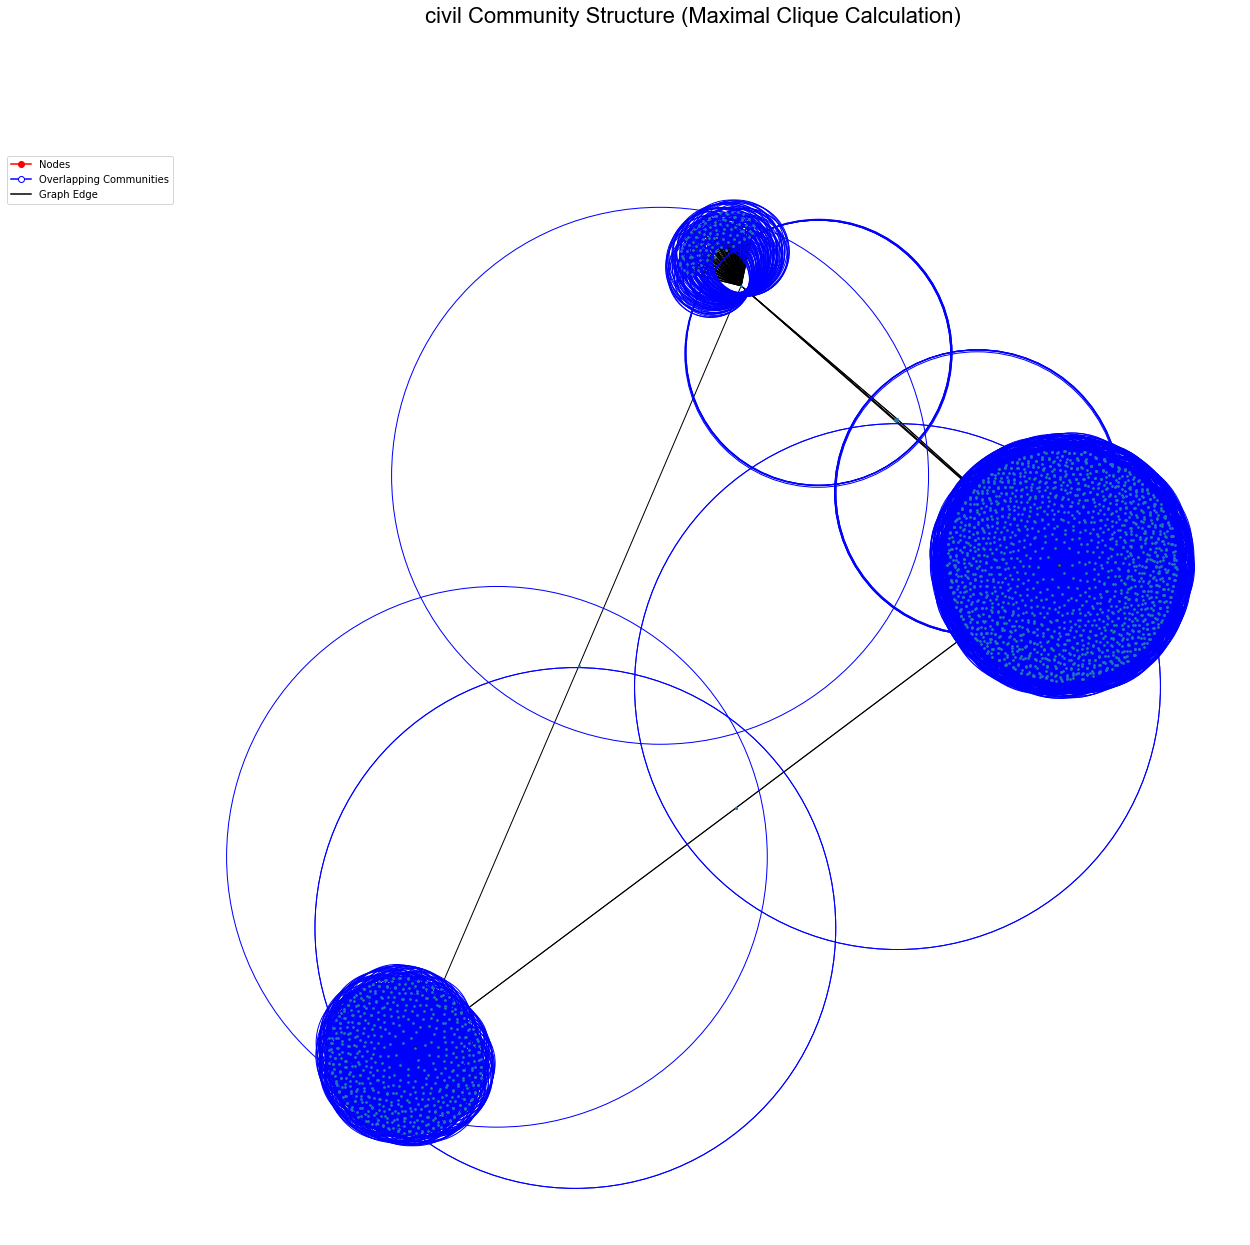

In [67]:
# Position nodes using Fruchterman-Reingold force-directed algorithm
civil_pos = nx.spring_layout(civil_graph)

# Remove "len(clique)>2" if you're interested in maxcliques with 2 edges
cliques=[clique for clique in nx.find_cliques(civil_graph) if len(clique)>1]
print('maximal number of cliques:', len(cliques))

# Draw the graph
plt.rcParams['figure.figsize']= [20, 20]
nx.draw_networkx(civil_graph,civil_pos, node_size=3, with_labels=False)
for clique in cliques:
    nx.draw_networkx_nodes(civil_graph,civil_pos,nodelist=clique,node_color=draw_circle_around_clique(clique,civil_pos),node_size=1000, alpha=0)
plt.suptitle('civil Community Structure (Maximal Clique Calculation)',fontsize=22, fontname='Arial')
plt.box(on=None)
plt.axis('off')
         
red_patch=mpatches.Patch(color='r', label='Nodes')
#blue_patch = plt.Circle(color='b', label='Overlapping Communities', fill=False)

red_patch=plt.Line2D([],[], color="red", marker='o', markerfacecolor="red",label='Nodes')
blue_patch=plt.Line2D([],[], color="blue", marker='o', markerfacecolor='white',label='Overlapping Communities')
black_patch=plt.Line2D([],[], color="black",label='Graph Edge')
plt.legend(handles=[red_patch,blue_patch, black_patch],bbox_to_anchor=(0,1), loc='best', ncol=1)
plt.savefig('civil Cliques.png',dpi=400, bbox_inches='tight')
plt.show()

In [70]:
# Maximal Cliques of media
a=nx.find_cliques(media_graph)
i=0

# For each clique, print the total number of communities
for clique in a:
    i+=1
total_comm_max_cl=i
print('Total number of communities: ',total_comm_max_cl)

Total number of communities:  2618


maximal number of cliques: 2618


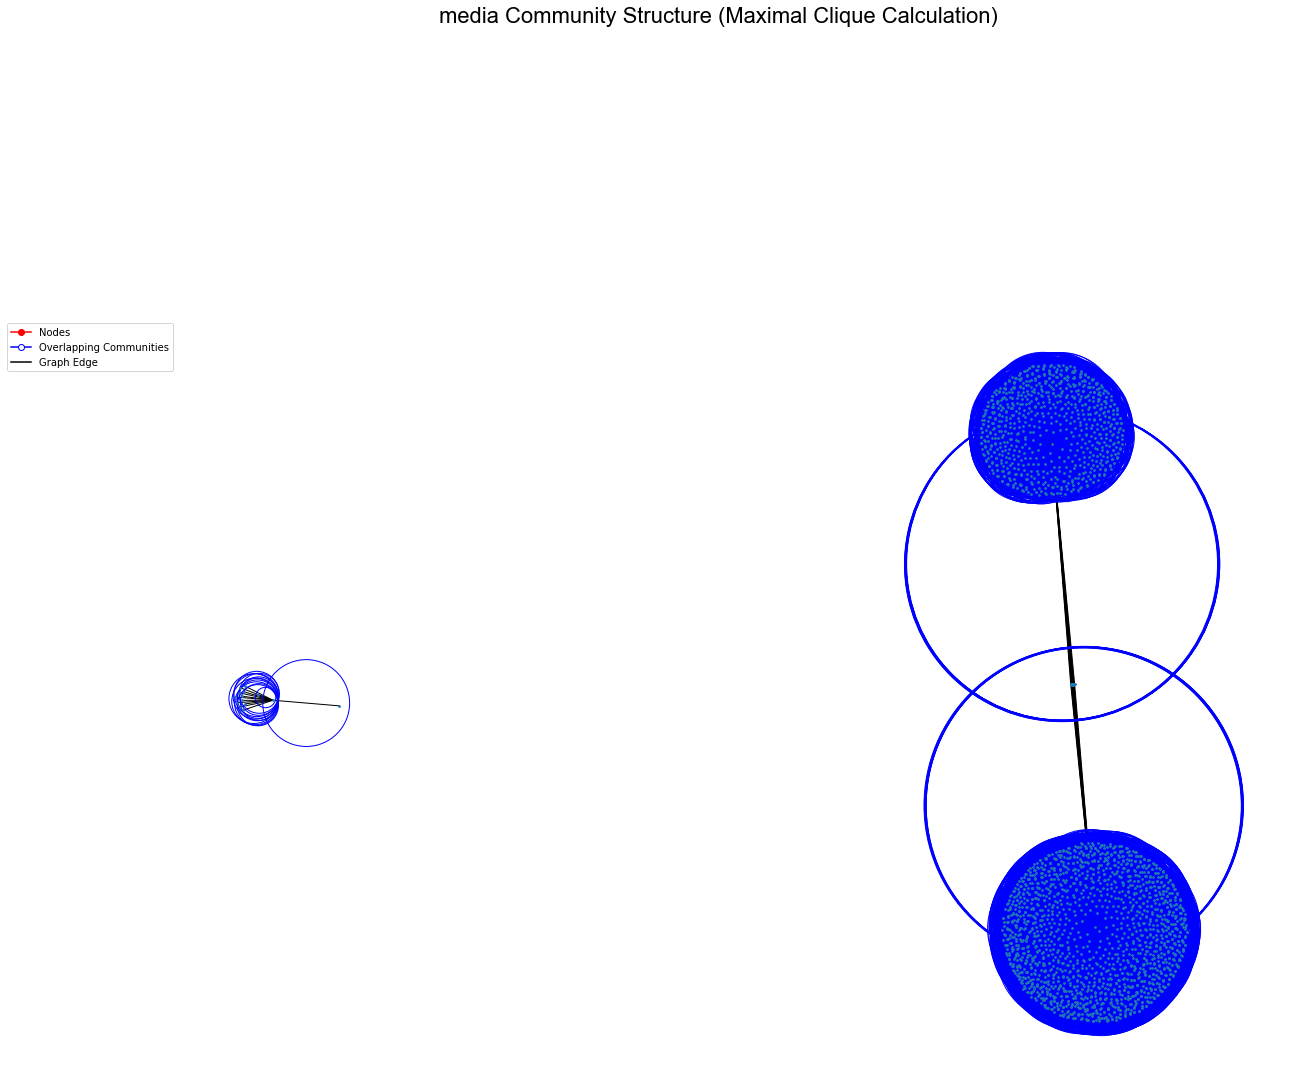

In [69]:
# Position nodes using Fruchterman-Reingold force-directed algorithm
media_pos = nx.spring_layout(media_graph)

# Remove "len(clique)>2" if you're interested in maxcliques with 2 edges
cliques=[clique for clique in nx.find_cliques(media_graph) if len(clique)>1]
print('maximal number of cliques:', len(cliques))

# Draw the graph
plt.rcParams['figure.figsize']= [20, 20]
nx.draw_networkx(media_graph,media_pos, node_size=3, with_labels=False)
for clique in cliques:
    nx.draw_networkx_nodes(media_graph,media_pos,nodelist=clique,node_color=draw_circle_around_clique(clique,media_pos),node_size=1000, alpha=0)
plt.suptitle('media Community Structure (Maximal Clique Calculation)',fontsize=22, fontname='Arial')
plt.box(on=None)
plt.axis('off')
         
red_patch=mpatches.Patch(color='r', label='Nodes')
#blue_patch = plt.Circle(color='b', label='Overlapping Communities', fill=False)

red_patch=plt.Line2D([],[], color="red", marker='o', markerfacecolor="red",label='Nodes')
blue_patch=plt.Line2D([],[], color="blue", marker='o', markerfacecolor='white',label='Overlapping Communities')
black_patch=plt.Line2D([],[], color="black",label='Graph Edge')
plt.legend(handles=[red_patch,blue_patch, black_patch],bbox_to_anchor=(0,1), loc='best', ncol=1)
plt.savefig('media Cliques.png',dpi=400, bbox_inches='tight')
plt.show()

In [15]:
cliques_communities = [12280,24879,8868,2443,7987,8190,4284,2486,2618]
network_measures['cliques_communities'] = cliques_communities

In [16]:
max_cliques = [12227,24859,8857,2443,7987,8190,4284,2486,2618]
network_measures['max_cliques'] = max_cliques

# 4. label propagation communities


In [20]:
def custom_asyn_lpa_communities(G):
    # 1) initialize all node lable unique
    node_labels = {n: i for i, n in enumerate(G)}
    # 이 알고리즘의 종료 조건은 "모든 노드의 label이 neighbor에서 가장 빈도가 높은 label일 경우 종료"
    # 즉, "최소한, 한 노드라도 업데이트가 된다면, 3)으로 돌아가게됨 "
    # 어떤 노드에서라도 업데이트가 발생하면 이를 True로 바꾸어 처리.
    AT_LEAST_ONE_NODE_LABEL_CHANGE = True
    while AT_LEAST_ONE_NODE_LABEL_CHANGE:
        AT_LEAST_ONE_NODE_LABEL_CHANGE = False
        # 2) node shuffling: random성을 주기 위해서 node의 순서를 섞음.
        shuffled_nodes = list(G.nodes())
        np.random.shuffle(shuffled_nodes)
        # 3) Update each nodel label by max frequency-label of their neighbors
        # node u의 이웃 중에서 가장 수가 많은 label이 u의 label.
        # 동점자가 있을 경우 그 중에서 uniform-random-choice
        for u in shuffled_nodes:
            u_nbr = G[u]
            if len(u_nbr) > 0:# neighbor이 없으면 label propagation이 불가능함.
                # nbr_label_counter에 nbr의 label을 빈도 수로 정리함.
                nbr_labels = [node_labels[v] for v in u_nbr]
                nbr_label_counter = dict(collections.Counter(nbr_labels))
                max_freq_label = max(nbr_label_counter.values())
                # max_frequency를 가진 label이 1개라면 그 label로 바꿔야 하고.
                # max_frequency를 가진 label이 1개 이상이면, 그중에서 random choose
                best_labels = [k for k, v in nbr_label_counter.items() if v==max_freq_label]
                choosed_label = np.random.choice(best_labels)
                # 4) 어떤, 하나의 node라도 변경이 되었다면, 계속 진행함.
                # 즉, node가 변경되었으므로, AT_LEAST_ONE_NODE_LABEL_CHANGE를 True로 업데이트.
                if node_labels[u] != choosed_label:
                    node_labels[u] = choosed_label
                    AT_LEAST_ONE_NODE_LABEL_CHANGE = True
        ##################################################
        # node_labels: dict(node -> label) 을
        # label_to_nodes_dict: dict(label => [node, node])로 변경하여
        label_to_nodes_dict = {}
        for n, label in node_labels.items():
            if label in label_to_nodes_dict:
                label_to_nodes_dict[label].append(n)
            else:
                label_to_nodes_dict[label] = [n]
        return list(label_to_nodes_dict.values())

In [23]:
lpa_communities = [len(custom_asyn_lpa_communities(x)) for x in graphs]
lpa_communities

[2444, 2844, 1259, 3, 3, 3, 3, 3, 3]

In [24]:
network_measures['lpa_communities'] = lpa_communities

In [25]:
network_measures

network  num_tweets  num_followers  max_likes  num_nodes  degree_mean  \
0    taipei       36573        1162578        957      13410     1.927517   
1   telaviv       34217         147540        658      24485     2.167286   
2   tallinn       28862          37884        518       9060     2.203753   
3    public       10701         307537        406       2431     2.012341   
4     corpo       10211         903200        568       7927     2.016652   
5   startup        9480          20473        457       8087     2.026215   
6  academic        4906          12457        303       4248     2.018362   
7     civil        3001          12069        399       2480     2.007258   
8     media        9330          92266          0       2604     2.012289   

   degree_std  degree_min  degree_max  deg_centrality_mean  \
0   28.761169           1        2125             0.000144   
1   50.425730           1        5567             0.000089   
2   33.758994           1        2543             0.000243   
3   36.892936           1        1748             0.000828   
4   54.149930           1        3712             0.000254   
5   66.467154           1        5566             0.000251   
6   56.147764           1        3631             0.000475   
7   38.102206           1        1806             0.000810   
8   38.486331           1        1784             0.000773   

   deg_centrality_std  deg_centrality_min  deg_centrality_max  closeness_mean  \
0            0.002145            0.000075            0.158476        0.109024   
1            0.002060            0.000041            0.227373        0.189776   
2            0.003727            0.000110            0.280715        0.181171   
3            0.015182            0.000412            0.719342        0.317292   
4            0.006832            0.000126            0.468332        0.308119   
5            0.008220            0.000124            0.688350        0.351296   
6            0.013221            0.000235            0.854956        0.411331   
7            0.015370            0.000403            0.728520        0.362339   
8            0.014785            0.000384            0.685363        0.352244   

   closeness_std  closeness_max  closeness_min  eigenvector_mean  \
0       0.081084       0.272072       0.000000          0.003064   
1       0.087533       0.382440       0.000000          0.002418   
2       0.100480       0.387158       0.000000          0.004715   
3       0.103807       0.642636       0.054836          0.012410   
4       0.020524       0.500063       0.246141          0.005620   
5       0.047911       0.615935       0.258067          0.006645   
6       0.062585       0.774859       0.259517          0.010165   
7       0.051542       0.647766       0.255593          0.012336   
8       0.048025       0.612821       0.002597          0.011763   

   eigenvector_std  eigenvector_min  eigenvector_max  betweenness_mean  \
0         0.008074    -3.365196e-18         0.690520          0.000106   
1         0.005916    -8.645877e-18         0.704143          0.000085   
2         0.009389    -2.803467e-18         0.679407          0.000176   
3         0.016046    -6.938894e-18         0.711278          0.000532   
4         0.009725     1.944144e-04         0.709748          0.000285   
5         0.008917     4.749810e-05         0.709295          0.000236   
6         0.011494     6.692745e-05         0.710011          0.000357   
7         0.015848     2.697901e-05         0.711251          0.000737   
8         0.015676     3.469447e-18         0.711170          0.000703   

   betweenness_std  betweenness_min  betweenness_max  load_mean  load_std  \
0         0.002983              0.0         0.210036   0.000106  0.002972   
1         0.003438              0.0         0.349891   0.000085  0.003420   
2         0.005127              0.0         0.351748   0.000176  0.005109   
3         0.016457              0.0         0.760753   0.000532  0.0164